# Project 2: Transposition modelling ( ☕ )


### Objective: 
* Model irradiance on a tilted plane and validate with measurements.
### Analysis & Evaluation: 
* Present statistics and figures on modelling results of GTI. Find optimal parameters for the transposition models. Find optimal inclination for the locations

### Proposed tools: 
* PVLib transposition modelling tools

### Datasets to use: 
* Eye2sky_12_days

### Keywords: 
* GHI, DHI, DNI, GTI, transposition modeling

### DS1: Eye2sky_12_days:
* For the projects involving ground measurements a selection of 12 days on the year 2020 will be given.

### The characteristics of the dataset are:

* Stations : OLDON,OLUOL,OLCLO (+Almaeria in a few days) [missing: PVNOR,LEEER,]
* parameters of interest : GHI, DHI, DNI, GTI_30_180 (GTI 30° Tilt, 180° Azimuth), Relative humidity, air temperature
* data temporal resolution : 60s

#### zwischen 5-6 Modelle entscheiden, für 4 Standorte:
* Global Horizontal I
* Diffuse Horizontal I
* Direct Normal I
* Plane of Array
* Global Tilted I 30,180

### Nur Messwerte für GTI_30_180, Modelle daher nur mit diesen Parametern verlgiechen
### Welches Modell hat am besten an den verschiedenen Standorten geklappt?
### Vergleich: Berechnete Modelle mit gemessene Werte, Error Analysis
### Ausblick: Wäre anderer Tilt z.B. besser für verschiedene Standorte?

In [1]:
import h5py
import matplotlib.pyplot as plt
import pvlib
import numpy as np
import pandas as pd

In [2]:
## OLCLO data

In [3]:
##EZ DATA FRAME with dictionarys
#dates = ['20200915','20200916','20200917']
#stations = ['OLUOL','OLDON']
#data = {}

#for station in stations:
#    data[station]=[]
#    for date in dates:
#        filename= 'C:/Users/Andre/Sync/Studium/AKTUELL SoSe 22/Adv. Solar Energy Meteorology/ProjektWork/solenmet_ss22_group2/{s}/{d}.l1.h5'.format(s=station,d=date)
#        h5 = h5py.File(filename,'r')
#        #data.append(h5['60s/ghi.1'][:])
#        data[station].append(h5['60s/ghi.1'][:])
#        #string interpolation
#data['OLUOL']

In [4]:
OLCLO_20_09_15 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLCLO\20200915.l1.h5", 'r')
OLCLO_20_09_16 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLCLO\20200916.l1.h5", 'r')
OLCLO_20_09_17 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLCLO\20200917.l1.h5", 'r')
OLCLO_20_09_18 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLCLO\20200918.l1.h5", 'r')
OLCLO_20_09_19 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLCLO\20200919.l1.h5", 'r')
OLCLO_20_09_20 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLCLO\20200920.l1.h5", 'r')
OLCLO_20_09_21 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLCLO\20200921.l1.h5", 'r')
OLCLO_20_09_22 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLCLO\20200922.l1.h5", 'r')
OLCLO_20_09_23 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLCLO\20200923.l1.h5", 'r')
OLCLO_20_09_24 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLCLO\20200924.l1.h5", 'r')
OLCLO_20_09_25 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLCLO\20200925.l1.h5", 'r')
OLCLO_20_09_26 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLCLO\20200926.l1.h5", 'r')
OLCLO_20_09_27 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLCLO\20200927.l1.h5", 'r')
OLCLO_20_09_28 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLCLO\20200928.l1.h5", 'r')
OLCLO_20_09_29 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLCLO\20200929.l1.h5", 'r')
OLCLO_20_09_30 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLCLO\20200930.l1.h5", 'r')

OLUOL_20_09_15 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLUOL\20200915.l1.h5", 'r')
OLUOL_20_09_16 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLUOL\20200916.l1.h5", 'r')
OLUOL_20_09_17 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLUOL\20200917.l1.h5", 'r')
OLUOL_20_09_18 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLUOL\20200918.l1.h5", 'r')
OLUOL_20_09_19 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLUOL\20200919.l1.h5", 'r')
OLUOL_20_09_20 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLUOL\20200920.l1.h5", 'r')
OLUOL_20_09_21 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLUOL\20200921.l1.h5", 'r')
OLUOL_20_09_22 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLUOL\20200922.l1.h5", 'r')
OLUOL_20_09_23 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLUOL\20200923.l1.h5", 'r')
OLUOL_20_09_24 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLUOL\20200924.l1.h5", 'r')
OLUOL_20_09_25 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLUOL\20200925.l1.h5", 'r')
OLUOL_20_09_26 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLUOL\20200926.l1.h5", 'r')
OLUOL_20_09_27 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLUOL\20200927.l1.h5", 'r')
OLUOL_20_09_28 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLUOL\20200928.l1.h5", 'r')
OLUOL_20_09_29 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLUOL\20200929.l1.h5", 'r')
OLUOL_20_09_30 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLUOL\20200930.l1.h5", 'r')

OLDON_20_09_15 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLDON\20200915.l1.h5", 'r')
OLDON_20_09_16 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLDON\20200916.l1.h5", 'r')
OLDON_20_09_17 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLDON\20200917.l1.h5", 'r')
OLDON_20_09_18 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLDON\20200918.l1.h5", 'r')
OLDON_20_09_19 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLDON\20200919.l1.h5", 'r')
OLDON_20_09_20 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLDON\20200920.l1.h5", 'r')
OLDON_20_09_21 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLDON\20200921.l1.h5", 'r')
OLDON_20_09_22 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLDON\20200922.l1.h5", 'r')
OLDON_20_09_23 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLDON\20200923.l1.h5", 'r')
OLDON_20_09_24 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLDON\20200924.l1.h5", 'r')
OLDON_20_09_25 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLDON\20200925.l1.h5", 'r')
OLDON_20_09_26 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLDON\20200926.l1.h5", 'r')
OLDON_20_09_27 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLDON\20200927.l1.h5", 'r')
OLDON_20_09_28 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLDON\20200928.l1.h5", 'r')
OLDON_20_09_29 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLDON\20200929.l1.h5", 'r')
OLDON_20_09_30 = h5py.File(r"C:\Users\Andre\Sync\Studium\AKTUELL SoSe 22\Adv. Solar Energy Meteorology\ProjektWork\solenmet_ss22_group2\OLDON\20200930.l1.h5", 'r')

OLCLO_lat = OLCLO_20_09_15.attrs['latitude'] # always 53.112004
OLCLO_lon = OLCLO_20_09_15.attrs['longitude'] # always 8.210042

OLUOL_lat = OLUOL_20_09_15.attrs['latitude'] # always 53.15342
OLUOL_lon = OLUOL_20_09_15.attrs['longitude'] # always 8.16191

OLDON_lat = OLDON_20_09_15.attrs['latitude'] # always 53.1463789
OLDON_lon = OLDON_20_09_15.attrs['longitude'] # always 8.2173352

In [39]:
OLCLO = [OLCLO_20_09_15,OLCLO_20_09_16,OLCLO_20_09_17,OLCLO_20_09_18,OLCLO_20_09_19,OLCLO_20_09_20,OLCLO_20_09_21,
        OLCLO_20_09_22,OLCLO_20_09_23,OLCLO_20_09_24,OLCLO_20_09_25,OLCLO_20_09_26,OLCLO_20_09_27,OLCLO_20_09_28,OLCLO_20_09_29,OLCLO_20_09_30]

OLUOL = [OLUOL_20_09_15,OLUOL_20_09_16,OLUOL_20_09_17,OLUOL_20_09_18,OLUOL_20_09_19,OLUOL_20_09_20,OLUOL_20_09_21,
        OLUOL_20_09_22,OLUOL_20_09_23,OLUOL_20_09_24,OLUOL_20_09_25,OLUOL_20_09_26,OLUOL_20_09_27,OLUOL_20_09_28,OLUOL_20_09_29,OLUOL_20_09_30]

OLDON = [OLDON_20_09_15,OLDON_20_09_16,OLDON_20_09_17,OLDON_20_09_18,OLDON_20_09_19,OLDON_20_09_20,OLDON_20_09_21,
        OLDON_20_09_22,OLDON_20_09_23,OLDON_20_09_24,OLDON_20_09_25,OLDON_20_09_26,OLDON_20_09_27,OLDON_20_09_28,OLDON_20_09_29,OLDON_20_09_30]

OLCLO_dts = np.array([])
OLCLO_ghi = np.array([])
OLCLO_dni = np.array([])
OLCLO_dhi = np.array([])
OLCLO_GTI = np.array([])

OLUOL_dts = np.array([])
OLUOL_ghi = np.array([])
OLUOL_dni = np.array([])
OLUOL_dhi = np.array([])
OLUOL_GTI = np.array([])

OLDON_dts = np.array([])
OLDON_ghi = np.array([])
OLDON_dni = np.array([])
OLDON_dhi = np.array([])
OLDON_GTI = np.array([])

for day in OLCLO:
    OLCLO_dts = np.append(OLCLO_dts, day['60s/datetime'][:])
    OLCLO_ghi = np.append(OLCLO_ghi, day['60s/ghi.1'][:])
    OLCLO_dni = np.append(OLCLO_dni, day['60s/dni.1'][:])
    OLCLO_dhi = np.append(OLCLO_dhi, day['60s/dhi.1'][:])
    OLCLO_GTI = np.append(OLCLO_GTI, day['60s/gti_30_180.1'][:])

for day in OLUOL:
    OLUOL_dts = np.append(OLUOL_dts, day['60s/datetime'][:])
    OLUOL_ghi = np.append(OLUOL_ghi, day['60s/ghi.1'][:])
    OLUOL_dni = np.append(OLUOL_dni, day['60s/dni.1'][:])
    OLUOL_dhi = np.append(OLUOL_dhi, day['60s/dhi.1'][:])
    OLUOL_GTI = np.append(OLUOL_GTI, day['60s/gti_30_180.1'][:])

for day in OLDON:
    OLDON_dts = np.append(OLDON_dts, day['60s/datetime'][:])
    OLDON_ghi = np.append(OLDON_ghi, day['60s/ghi.1'][:])
    OLDON_dni = np.append(OLDON_dni, day['60s/dni.1'][:])
    OLDON_dhi = np.append(OLDON_dhi, day['60s/dhi.1'][:])
    OLDON_GTI = np.append(OLDON_GTI, day['60s/gti_30_180.1'][:])
    
    
OLCLO_dts = OLCLO_dts.astype('datetime64[s]')
OLUOL_dts = OLUOL_dts.astype('datetime64[s]')
OLDON_dts = OLDON_dts.astype('datetime64[s]')

print(OLCLO_dts[2]-OLCLO_dts[1])





60 seconds


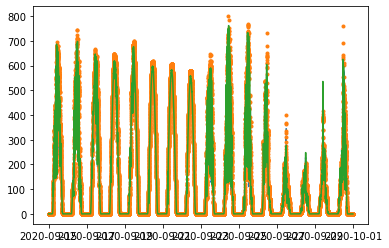

In [7]:
plt.plot(OLCLO_dts,OLCLO_ghi,'--')
plt.plot(OLUOL_dts,OLUOL_ghi,'.')
plt.plot(OLDON_dts,OLDON_ghi,'-')

C:\Users\Andre\anaconda3\lib\site-packages\pvlib\solarposition.py:365: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  unixtime = np.array(time.astype(np.int64)/10**9)


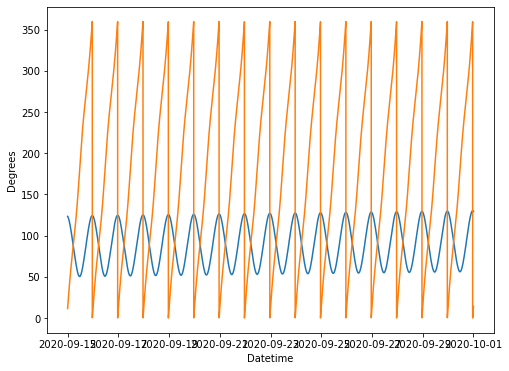

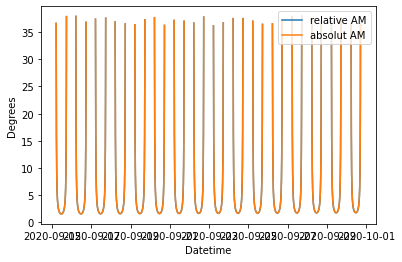

In [8]:
## solpos
OLCLO_solpos = pvlib.solarposition.get_solarposition(OLCLO_dts, OLCLO_lat, OLCLO_lon)
OLUOL_solpos = pvlib.solarposition.get_solarposition(OLUOL_dts, OLUOL_lat, OLUOL_lon)
OLDON_solpos = pvlib.solarposition.get_solarposition(OLDON_dts, OLDON_lat, OLDON_lon)

plt.figure(figsize=(8,6))
plt.plot(OLCLO_solpos[['apparent_zenith','azimuth']])
plt.xlabel('Datetime')
plt.ylabel('Degrees')
plt.show()

## Airmass
OLCLO_rel_AM = pvlib.atmosphere.get_relative_airmass(OLCLO_solpos['apparent_zenith'])
OLUOL_rel_AM = pvlib.atmosphere.get_relative_airmass(OLUOL_solpos['apparent_zenith'])
OLDON_rel_AM = pvlib.atmosphere.get_relative_airmass(OLDON_solpos['apparent_zenith'])

OLCLO_abs_AM = pvlib.atmosphere.get_absolute_airmass(OLCLO_rel_AM)
OLUOL_abs_AM = pvlib.atmosphere.get_absolute_airmass(OLUOL_rel_AM)
OLDON_abs_AM = pvlib.atmosphere.get_absolute_airmass(OLDON_rel_AM)

plt.plot(OLCLO_dts, OLCLO_rel_AM, label='relative AM')
plt.plot(OLCLO_dts, OLCLO_abs_AM, label='absolut AM')
plt.xlabel('Datetime')
plt.ylabel('Degrees')
plt.legend()

## Modeling

### CLO

In [9]:
PV_tilt = 30 
PV_azimuth = 180 # south

OLCLO_dni_extra = pvlib.irradiance.get_extra_radiation(pd.DatetimeIndex(OLCLO_dts))
OLCLO_airmass = pvlib.atmosphere.get_relative_airmass(OLCLO_solpos['apparent_zenith'])

OLCLO_GTI_iso = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, OLCLO_solpos['apparent_zenith'], OLCLO_solpos['azimuth'], OLCLO_dni, OLCLO_ghi, OLCLO_dhi, model='isotropic') #SZA,SAA
OLCLO_GTI_klucher = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, OLCLO_solpos['apparent_zenith'], OLCLO_solpos['azimuth'], OLCLO_dni, OLCLO_ghi, OLCLO_dhi, model='klucher',dni_extra = 1366)
OLCLO_GTI_king = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, OLCLO_solpos['apparent_zenith'], OLCLO_solpos['azimuth'], OLCLO_dni, OLCLO_ghi, OLCLO_dhi, model='king')
OLCLO_GTI_perez = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, OLCLO_solpos['apparent_zenith'], OLCLO_solpos['azimuth'], OLCLO_dni, OLCLO_ghi, OLCLO_dhi, airmass=OLCLO_airmass, model='perez', model_perez='allsitescomposite1990', dni_extra = 1366)
OLCLO_GTI_reindl = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, OLCLO_solpos['apparent_zenith'], OLCLO_solpos['azimuth'], OLCLO_dni, OLCLO_ghi, OLCLO_dhi, model='reindl',dni_extra = 1366)
OLCLO_GTI_haydavies = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, OLCLO_solpos['apparent_zenith'], OLCLO_solpos['azimuth'], OLCLO_dni, OLCLO_ghi, OLCLO_dhi, model='haydavies',dni_extra = 1366)

### UOL

In [10]:
OLUOL_dni_extra = pvlib.irradiance.get_extra_radiation(pd.DatetimeIndex(OLUOL_dts))
OLUOL_airmass = pvlib.atmosphere.get_relative_airmass(OLUOL_solpos['apparent_zenith'])

OLUOL_GTI_iso = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, OLUOL_solpos['apparent_zenith'], OLUOL_solpos['azimuth'], OLUOL_dni, OLUOL_ghi, OLUOL_dhi, model='isotropic') #SZA,SAA
OLUOL_GTI_klucher = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, OLUOL_solpos['apparent_zenith'], OLUOL_solpos['azimuth'], OLUOL_dni, OLUOL_ghi, OLUOL_dhi, model='klucher',dni_extra = 1366)
OLUOL_GTI_king = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, OLUOL_solpos['apparent_zenith'], OLUOL_solpos['azimuth'], OLUOL_dni, OLUOL_ghi, OLUOL_dhi, model='king')
OLUOL_GTI_perez = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, OLUOL_solpos['apparent_zenith'], OLUOL_solpos['azimuth'], OLUOL_dni, OLUOL_ghi, OLUOL_dhi, airmass=OLUOL_airmass, model='perez', model_perez='allsitescomposite1990', dni_extra = 1366)
OLUOL_GTI_reindl = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, OLUOL_solpos['apparent_zenith'], OLUOL_solpos['azimuth'], OLUOL_dni, OLUOL_ghi, OLUOL_dhi, model='reindl',dni_extra = 1366)
OLUOL_GTI_haydavies = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, OLUOL_solpos['apparent_zenith'], OLUOL_solpos['azimuth'], OLUOL_dni, OLUOL_ghi, OLUOL_dhi, model='haydavies',dni_extra = 1366)

### DON

In [11]:
OLDON_dni_extra = pvlib.irradiance.get_extra_radiation(pd.DatetimeIndex(OLDON_dts))
OLDON_airmass = pvlib.atmosphere.get_relative_airmass(OLDON_solpos['apparent_zenith'])

OLDON_GTI_iso = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, OLDON_solpos['apparent_zenith'], OLDON_solpos['azimuth'], OLDON_dni, OLDON_ghi, OLDON_dhi, model='isotropic') #SZA,SAA
OLDON_GTI_perez = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, OLDON_solpos['apparent_zenith'], OLDON_solpos['azimuth'], OLDON_dni, OLDON_ghi, OLDON_dhi, airmass=OLDON_airmass, model='perez', model_perez='allsitescomposite1990', dni_extra = 1366)
OLDON_GTI_klucher = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, OLDON_solpos['apparent_zenith'], OLDON_solpos['azimuth'], OLDON_dni, OLDON_ghi, OLDON_dhi, model='klucher',dni_extra = 1366)
OLDON_GTI_king = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, OLDON_solpos['apparent_zenith'], OLDON_solpos['azimuth'], OLDON_dni, OLDON_ghi, OLDON_dhi, model='king')
OLDON_GTI_reindl = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, OLDON_solpos['apparent_zenith'], OLDON_solpos['azimuth'], OLDON_dni, OLDON_ghi, OLDON_dhi, model='reindl',dni_extra = 1366)
OLDON_GTI_haydavies = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, OLDON_solpos['apparent_zenith'], OLDON_solpos['azimuth'], OLDON_dni, OLDON_ghi, OLDON_dhi, model='haydavies',dni_extra = 1366)

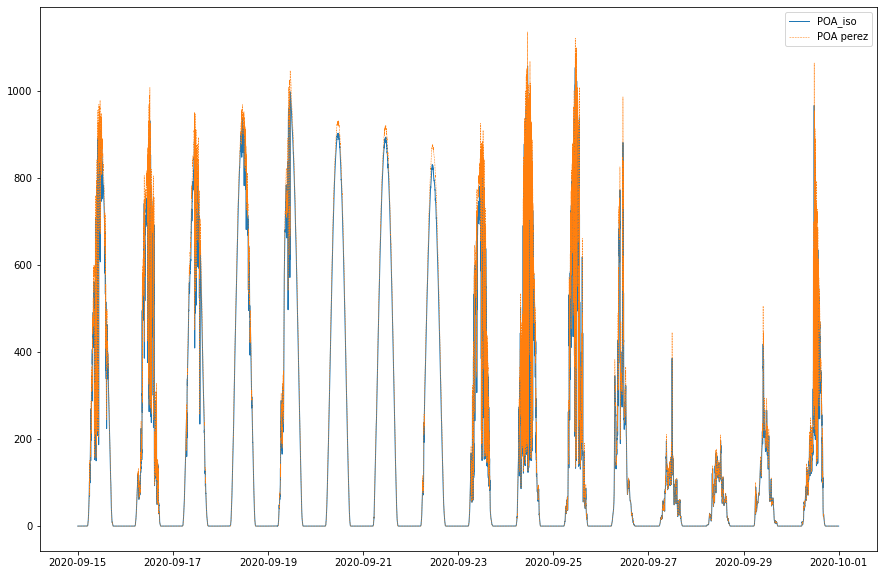

In [12]:
## test plot if data works
plt.figure(figsize=(15,10))
plt.plot(OLUOL_dts, OLUOL_GTI_iso['poa_global'],linewidth=1,label='POA_iso')
plt.plot(OLUOL_dts, OLUOL_GTI_perez['poa_global'],'--', linewidth=0.5,label='POA perez')
plt.legend()

## Error Metrics

### CLO

In [13]:
OLCLO_GTI_iso_err = OLCLO_GTI_iso['poa_global'] - OLCLO_GTI 
OLCLO_GTI_perez_err = OLCLO_GTI_perez['poa_global'] - OLCLO_GTI 
OLCLO_GTI_reindl_err = OLCLO_GTI_reindl['poa_global'] - OLCLO_GTI 
OLCLO_GTI_king_err = OLCLO_GTI_king['poa_global'] - OLCLO_GTI 
OLCLO_GTI_haydavies_err = OLCLO_GTI_haydavies['poa_global'] - OLCLO_GTI 
OLCLO_GTI_klucher_err = OLCLO_GTI_klucher['poa_global'] - OLCLO_GTI


## Mean Bias Error MBE
# Bias => Systematic error : on average, the values of the model underestimate the reference by X W/m² (precision of my model)
OLCLO_GTI_iso_bias = np.mean(OLCLO_GTI_iso_err)
OLCLO_GTI_perez_bias = np.mean(OLCLO_GTI_perez_err)
OLCLO_GTI_reindl_bias = np.mean(OLCLO_GTI_reindl_err)
OLCLO_GTI_king_bias = np.mean(OLCLO_GTI_king_err)
OLCLO_GTI_haydavies_bias = np.mean(OLCLO_GTI_haydavies_err)
OLCLO_GTI_klucher_bias = np.mean(OLCLO_GTI_klucher_err)

## We can remove the bias (or systematic error) from the data :
OLCLO_GTI_iso_err_unbiased = OLCLO_GTI_iso_err - OLCLO_GTI_iso_bias
OLCLO_GTI_perez_err_unbiased = OLCLO_GTI_perez_err - OLCLO_GTI_perez_bias
OLCLO_GTI_reindl_err_unbiased = OLCLO_GTI_reindl_err - OLCLO_GTI_reindl_bias
OLCLO_GTI_king_err_unbiased = OLCLO_GTI_king_err - OLCLO_GTI_king_bias
OLCLO_GTI_haydavies_err_unbiased = OLCLO_GTI_haydavies_err - OLCLO_GTI_haydavies_bias
OLCLO_GTI_klucher_err_unbiased = OLCLO_GTI_klucher_err - OLCLO_GTI_klucher_bias

## standard deviation---------------------------------------------------------------------------------------------------
# The standard error provides information on the spread of the errors around their mean value (accuracy).
# only effect of the spread of the values around the truth removing the bias (systematic error)
OLCLO_GTI_iso_std = np.std(OLCLO_GTI_iso_err)
OLCLO_GTI_perez_std = np.std(OLCLO_GTI_perez_err)
OLCLO_GTI_reindl_std = np.std(OLCLO_GTI_reindl_err)
OLCLO_GTI_king_std = np.std(OLCLO_GTI_king_err)
OLCLO_GTI_haydavies_std = np.std(OLCLO_GTI_haydavies_err)
OLCLO_GTI_klucher_std = np.std(OLCLO_GTI_klucher_err)

## Root mean Square Error (RMSE)-----------------------------------------------------------------------------------------
# RMSE is a particular case of standard error => when bias = 0.
# RMSE is the standard deviation of the resitual error, that is, how spread are the error around the best fit.

# It accounts for the proportions of the systematic and random errors in a data set
# Well suited to compare different models/prediction/measurements between them selfs (how well they perform )

OLCLO_GTI_iso_RMSE = np.sqrt(1 / OLCLO_GTI_iso_err.size  * np.sum(OLCLO_GTI_iso_err**2))
OLCLO_GTI_perez_RMSE = np.sqrt(1 / OLCLO_GTI_perez_err.size  * np.sum(OLCLO_GTI_perez_err**2))
OLCLO_GTI_reindl_RMSE = np.sqrt(1 / OLCLO_GTI_reindl_err.size  * np.sum(OLCLO_GTI_reindl_err**2))
OLCLO_GTI_king_RMSE = np.sqrt(1 / OLCLO_GTI_king_err.size  * np.sum(OLCLO_GTI_king_err**2))
OLCLO_GTI_haydavies_RMSE = np.sqrt(1 / OLCLO_GTI_haydavies_err.size  * np.sum(OLCLO_GTI_haydavies_err**2))
OLCLO_GTI_klucher_RMSE = np.sqrt(1 / OLCLO_GTI_klucher_err.size  * np.sum(OLCLO_GTI_klucher_err**2))

## mean absolut error (MAE)----------------------------------------------------------------------------------------------
# In contrast with the Bias, this error accounts for all deviations in the result. 
# That is, every residual adds to the total result no matter is sing
OLCLO_GTI_iso_MAE = 1/OLCLO_GTI_iso_err.size * np.sum(np.abs(OLCLO_GTI_iso_err))
OLCLO_GTI_perez_MAE = 1/OLCLO_GTI_perez_err.size * np.sum(np.abs(OLCLO_GTI_perez_err))
OLCLO_GTI_reindl_MAE = 1/OLCLO_GTI_reindl_err.size * np.sum(np.abs(OLCLO_GTI_reindl_err))
OLCLO_GTI_king_MAE = 1/OLCLO_GTI_king_err.size * np.sum(np.abs(OLCLO_GTI_king_err))
OLCLO_GTI_haydavies_MAE = 1/OLCLO_GTI_haydavies_err.size * np.sum(np.abs(OLCLO_GTI_haydavies_err))
OLCLO_GTI_klucher_MAE = 1/OLCLO_GTI_haydavies_err.size * np.sum(np.abs(OLCLO_GTI_klucher_err))

### UOL

In [14]:
OLUOL_GTI_iso_err = OLUOL_GTI_iso['poa_global'] - OLUOL_GTI 
OLUOL_GTI_perez_err = OLUOL_GTI_perez['poa_global'] - OLUOL_GTI 
OLUOL_GTI_reindl_err = OLUOL_GTI_reindl['poa_global'] - OLUOL_GTI 
OLUOL_GTI_king_err = OLUOL_GTI_king['poa_global'] - OLUOL_GTI 
OLUOL_GTI_haydavies_err = OLUOL_GTI_haydavies['poa_global'] - OLUOL_GTI 
OLUOL_GTI_klucher_err = OLUOL_GTI_klucher['poa_global'] - OLUOL_GTI


## Mean Bias Error MBE
# Bias => Systematic error : on average, the values of the model underestimate the reference by X W/m² (precision of my model)
OLUOL_GTI_iso_bias = np.mean(OLUOL_GTI_iso_err)
OLUOL_GTI_perez_bias = np.mean(OLUOL_GTI_perez_err)
OLUOL_GTI_reindl_bias = np.mean(OLUOL_GTI_reindl_err)
OLUOL_GTI_king_bias = np.mean(OLUOL_GTI_king_err)
OLUOL_GTI_haydavies_bias = np.mean(OLUOL_GTI_haydavies_err)
OLUOL_GTI_klucher_bias = np.mean(OLUOL_GTI_klucher_err)

## We can remove the bias (or systematic error) from the data :
OLUOL_GTI_iso_err_unbiased = OLUOL_GTI_iso_err - OLUOL_GTI_iso_bias
OLUOL_GTI_perez_err_unbiased = OLUOL_GTI_perez_err - OLUOL_GTI_perez_bias
OLUOL_GTI_reindl_err_unbiased = OLUOL_GTI_reindl_err - OLUOL_GTI_reindl_bias
OLUOL_GTI_king_err_unbiased = OLUOL_GTI_king_err - OLUOL_GTI_king_bias
OLUOL_GTI_haydavies_err_unbiased = OLUOL_GTI_haydavies_err - OLUOL_GTI_haydavies_bias
OLUOL_GTI_klucher_err_unbiased = OLUOL_GTI_klucher_err - OLUOL_GTI_klucher_bias

## standard deviation---------------------------------------------------------------------------------------------------
# The standard error provides information on the spread of the errors around their mean value (accuracy).
# only effect of the spread of the values around the truth removing the bias (systematic error)
OLUOL_GTI_iso_std = np.std(OLUOL_GTI_iso_err)
OLUOL_GTI_perez_std = np.std(OLUOL_GTI_perez_err)
OLUOL_GTI_reindl_std = np.std(OLUOL_GTI_reindl_err)
OLUOL_GTI_king_std = np.std(OLUOL_GTI_king_err)
OLUOL_GTI_haydavies_std = np.std(OLUOL_GTI_haydavies_err)
OLUOL_GTI_klucher_std = np.std(OLUOL_GTI_klucher_err)

## Root mean Square Error (RMSE)-----------------------------------------------------------------------------------------
# RMSE is a particular case of standard error => when bias = 0.
# RMSE is the standard deviation of the resitual error, that is, how spread are the error around the best fit.

# It accounts for the proportions of the systematic and random errors in a data set
# Well suited to compare different models/prediction/measurements between them selfs (how well they perform )

OLUOL_GTI_iso_RMSE = np.sqrt(1 / OLUOL_GTI_iso_err.size  * np.sum(OLUOL_GTI_iso_err**2))
OLUOL_GTI_perez_RMSE = np.sqrt(1 / OLUOL_GTI_perez_err.size  * np.sum(OLUOL_GTI_perez_err**2))
OLUOL_GTI_reindl_RMSE = np.sqrt(1 / OLUOL_GTI_reindl_err.size  * np.sum(OLUOL_GTI_reindl_err**2))
OLUOL_GTI_king_RMSE = np.sqrt(1 / OLUOL_GTI_king_err.size  * np.sum(OLUOL_GTI_king_err**2))
OLUOL_GTI_haydavies_RMSE = np.sqrt(1 / OLUOL_GTI_haydavies_err.size  * np.sum(OLUOL_GTI_haydavies_err**2))
OLUOL_GTI_klucher_RMSE = np.sqrt(1 / OLUOL_GTI_klucher_err.size  * np.sum(OLUOL_GTI_klucher_err**2))

## mean absolut error (MAE)----------------------------------------------------------------------------------------------
# In contrast with the Bias, this error accounts for all deviations in the result. 
# That is, every residual adds to the total result no matter is sing
OLUOL_GTI_iso_MAE = 1/OLUOL_GTI_iso_err.size * np.sum(np.abs(OLUOL_GTI_iso_err))
OLUOL_GTI_perez_MAE = 1/OLUOL_GTI_perez_err.size * np.sum(np.abs(OLUOL_GTI_perez_err))
OLUOL_GTI_reindl_MAE = 1/OLUOL_GTI_reindl_err.size * np.sum(np.abs(OLUOL_GTI_reindl_err))
OLUOL_GTI_king_MAE = 1/OLUOL_GTI_king_err.size * np.sum(np.abs(OLUOL_GTI_king_err))
OLUOL_GTI_haydavies_MAE = 1/OLUOL_GTI_haydavies_err.size * np.sum(np.abs(OLUOL_GTI_haydavies_err))
OLUOL_GTI_klucher_MAE = 1/OLUOL_GTI_haydavies_err.size * np.sum(np.abs(OLUOL_GTI_klucher_err))

### DON

In [15]:
OLDON_GTI_iso_err = OLDON_GTI_iso['poa_global'] - OLDON_GTI 
OLDON_GTI_perez_err = OLDON_GTI_perez['poa_global'] - OLDON_GTI 
OLDON_GTI_reindl_err = OLDON_GTI_reindl['poa_global'] - OLDON_GTI 
OLDON_GTI_king_err = OLDON_GTI_king['poa_global'] - OLDON_GTI 
OLDON_GTI_haydavies_err = OLDON_GTI_haydavies['poa_global'] - OLDON_GTI 
OLDON_GTI_klucher_err = OLDON_GTI_klucher['poa_global'] - OLDON_GTI


## Mean Bias Error MBE
# Bias => Systematic error : on average, the values of the model underestimate the reference by X W/m² (precision of my model)
OLDON_GTI_iso_bias = np.mean(OLDON_GTI_iso_err)
OLDON_GTI_perez_bias = np.mean(OLDON_GTI_perez_err)
OLDON_GTI_reindl_bias = np.mean(OLDON_GTI_reindl_err)
OLDON_GTI_king_bias = np.mean(OLDON_GTI_king_err)
OLDON_GTI_haydavies_bias = np.mean(OLDON_GTI_haydavies_err)
OLDON_GTI_klucher_bias = np.mean(OLDON_GTI_klucher_err)

## We can remove the bias (or systematic error) from the data :
OLDON_GTI_iso_err_unbiased = OLDON_GTI_iso_err - OLDON_GTI_iso_bias
OLDON_GTI_perez_err_unbiased = OLDON_GTI_perez_err - OLDON_GTI_perez_bias
OLDON_GTI_reindl_err_unbiased = OLDON_GTI_reindl_err - OLDON_GTI_reindl_bias
OLDON_GTI_king_err_unbiased = OLDON_GTI_king_err - OLDON_GTI_king_bias
OLDON_GTI_haydavies_err_unbiased = OLDON_GTI_haydavies_err - OLDON_GTI_haydavies_bias
OLDON_GTI_klucher_err_unbiased = OLDON_GTI_klucher_err - OLDON_GTI_klucher_bias

## standard deviation---------------------------------------------------------------------------------------------------
# The standard error provides information on the spread of the errors around their mean value (accuracy).
# only effect of the spread of the values around the truth removing the bias (systematic error)
OLDON_GTI_iso_std = np.std(OLDON_GTI_iso_err)
OLDON_GTI_perez_std = np.std(OLDON_GTI_perez_err)
OLDON_GTI_reindl_std = np.std(OLDON_GTI_reindl_err)
OLDON_GTI_king_std = np.std(OLDON_GTI_king_err)
OLDON_GTI_haydavies_std = np.std(OLDON_GTI_haydavies_err)
OLDON_GTI_klucher_std = np.std(OLDON_GTI_klucher_err)

## Root mean Square Error (RMSE)-----------------------------------------------------------------------------------------
# RMSE is a particular case of standard error => when bias = 0.
# RMSE is the standard deviation of the resitual error, that is, how spread are the error around the best fit.

# It accounts for the proportions of the systematic and random errors in a data set
# Well suited to compare different models/prediction/measurements between them selfs (how well they perform )

OLDON_GTI_iso_RMSE = np.sqrt(1 / OLDON_GTI_iso_err.size  * np.sum(OLDON_GTI_iso_err**2))
OLDON_GTI_perez_RMSE = np.sqrt(1 / OLDON_GTI_perez_err.size  * np.sum(OLDON_GTI_perez_err**2))
OLDON_GTI_reindl_RMSE = np.sqrt(1 / OLDON_GTI_reindl_err.size  * np.sum(OLDON_GTI_reindl_err**2))
OLDON_GTI_king_RMSE = np.sqrt(1 / OLDON_GTI_king_err.size  * np.sum(OLDON_GTI_king_err**2))
OLDON_GTI_haydavies_RMSE = np.sqrt(1 / OLDON_GTI_haydavies_err.size  * np.sum(OLDON_GTI_haydavies_err**2))
OLDON_GTI_klucher_RMSE = np.sqrt(1 / OLDON_GTI_klucher_err.size  * np.sum(OLDON_GTI_klucher_err**2))

## mean absolut error (MAE)----------------------------------------------------------------------------------------------
# In contrast with the Bias, this error accounts for all deviations in the result. 
# That is, every residual adds to the total result no matter is sing
OLDON_GTI_iso_MAE = 1/OLDON_GTI_iso_err.size * np.sum(np.abs(OLDON_GTI_iso_err))
OLDON_GTI_perez_MAE = 1/OLDON_GTI_perez_err.size * np.sum(np.abs(OLDON_GTI_perez_err))
OLDON_GTI_reindl_MAE = 1/OLDON_GTI_reindl_err.size * np.sum(np.abs(OLDON_GTI_reindl_err))
OLDON_GTI_king_MAE = 1/OLDON_GTI_king_err.size * np.sum(np.abs(OLDON_GTI_king_err))
OLDON_GTI_haydavies_MAE = 1/OLDON_GTI_haydavies_err.size * np.sum(np.abs(OLDON_GTI_haydavies_err))
OLDON_GTI_klucher_MAE = 1/OLDON_GTI_haydavies_err.size * np.sum(np.abs(OLDON_GTI_klucher_err))

## Results

#### CLO

In [16]:
print('iso')
print('The Bias is: {b:.2f} w/m²'.format(b=OLCLO_GTI_iso_bias))
print('The STD is: {s:.2f} w/m²'.format(s=OLCLO_GTI_iso_std))
print('The RMSE is {r:.2f} W/m²'.format(r=OLCLO_GTI_iso_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=OLCLO_GTI_iso_MAE))

print('perez')
print('The Bias is: {b:.2f} w/m²'.format(b=OLCLO_GTI_perez_bias))
print('The STD is: {s:.2f} w/m²'.format(s=OLCLO_GTI_perez_std))
print('The RMSE is {r:.2f} W/m²'.format(r=OLCLO_GTI_perez_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=OLCLO_GTI_perez_MAE))

print('reindl')
print('The Bias is: {b:.2f} w/m²'.format(b=OLCLO_GTI_reindl_bias))
print('The STD is: {s:.2f} w/m²'.format(s=OLCLO_GTI_reindl_std))
print('The RMSE is {r:.2f} W/m²'.format(r=OLCLO_GTI_reindl_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=OLCLO_GTI_reindl_MAE))

print('king')
print('The Bias is: {b:.2f} w/m²'.format(b=OLCLO_GTI_king_bias))
print('The STD is: {s:.2f} w/m²'.format(s=OLCLO_GTI_king_std))
print('The RMSE is {r:.2f} W/m²'.format(r=OLCLO_GTI_king_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=OLCLO_GTI_king_MAE))

print('haydavies')
print('The Bias is: {b:.2f} w/m²'.format(b=OLCLO_GTI_haydavies_bias))
print('The STD is: {s:.2f} w/m²'.format(s=OLCLO_GTI_haydavies_std))
print('The RMSE is {r:.2f} W/m²'.format(r=OLCLO_GTI_haydavies_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=OLCLO_GTI_haydavies_MAE))

print('klucher')
print('The Bias is: {b:.2f} w/m²'.format(b=OLCLO_GTI_klucher_bias))
print('The STD is: {s:.2f} w/m²'.format(s=OLCLO_GTI_klucher_std))
print('The RMSE is {r:.2f} W/m²'.format(r=OLCLO_GTI_klucher_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=OLCLO_GTI_klucher_MAE))

iso
The Bias is: -7.99 w/m²
The STD is: 18.68 w/m²
The RMSE is 20.32 W/m²
The MAE is 9.58 W/m²

perez
The Bias is: 2.72 w/m²
The STD is: 9.87 w/m²
The RMSE is 10.24 W/m²
The MAE is 5.28 W/m²

reindl
The Bias is: -0.77 w/m²
The STD is: 15.73 w/m²
The RMSE is 11.43 W/m²
The MAE is 5.31 W/m²

king
The Bias is: -2.18 w/m²
The STD is: 14.19 w/m²
The RMSE is 14.36 W/m²
The MAE is 6.82 W/m²

haydavies
The Bias is: -0.66 w/m²
The STD is: 11.59 w/m²
The RMSE is 11.61 W/m²
The MAE is 5.36 W/m²

klucher
The Bias is: 1.27 w/m²
The STD is: 9.08 w/m²
The RMSE is 9.17 W/m²
The MAE is 4.45 W/m²



### UOL

In [17]:
print('iso')
print('The Bias is: {b:.2f} w/m²'.format(b=OLUOL_GTI_iso_bias))
print('The STD is: {s:.2f} w/m²'.format(s=OLUOL_GTI_iso_std))
print('The RMSE is {r:.2f} W/m²'.format(r=OLUOL_GTI_iso_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=OLUOL_GTI_iso_MAE))

print('perez')
print('The Bias is: {b:.2f} w/m²'.format(b=OLUOL_GTI_perez_bias))
print('The STD is: {s:.2f} w/m²'.format(s=OLUOL_GTI_perez_std))
print('The RMSE is {r:.2f} W/m²'.format(r=OLUOL_GTI_perez_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=OLUOL_GTI_perez_MAE))

print('reindl')
print('The Bias is: {b:.2f} w/m²'.format(b=OLUOL_GTI_reindl_bias))
print('The STD is: {s:.2f} w/m²'.format(s=OLUOL_GTI_reindl_std))
print('The RMSE is {r:.2f} W/m²'.format(r=OLUOL_GTI_reindl_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=OLUOL_GTI_reindl_MAE))

print('king')
print('The Bias is: {b:.2f} w/m²'.format(b=OLUOL_GTI_king_bias))
print('The STD is: {s:.2f} w/m²'.format(s=OLUOL_GTI_king_std))
print('The RMSE is {r:.2f} W/m²'.format(r=OLUOL_GTI_king_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=OLUOL_GTI_king_MAE))

print('haydavies')
print('The Bias is: {b:.2f} w/m²'.format(b=OLUOL_GTI_haydavies_bias))
print('The STD is: {s:.2f} w/m²'.format(s=OLUOL_GTI_haydavies_std))
print('The RMSE is {r:.2f} W/m²'.format(r=OLUOL_GTI_haydavies_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=OLUOL_GTI_haydavies_MAE))

print('klucher')
print('The Bias is: {b:.2f} w/m²'.format(b=OLUOL_GTI_klucher_bias))
print('The STD is: {s:.2f} w/m²'.format(s=OLUOL_GTI_klucher_std))
print('The RMSE is {r:.2f} W/m²'.format(r=OLUOL_GTI_klucher_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=OLUOL_GTI_klucher_MAE))

iso
The Bias is: -12.53 w/m²
The STD is: 24.31 w/m²
The RMSE is 27.35 W/m²
The MAE is 13.35 W/m²

perez
The Bias is: -1.25 w/m²
The STD is: 10.70 w/m²
The RMSE is 10.77 W/m²
The MAE is 5.13 W/m²

reindl
The Bias is: -7.37 w/m²
The STD is: 18.34 w/m²
The RMSE is 14.40 W/m²
The MAE is 6.47 W/m²

king
The Bias is: -6.31 w/m²
The STD is: 18.08 w/m²
The RMSE is 19.15 W/m²
The MAE is 8.96 W/m²

haydavies
The Bias is: -4.15 w/m²
The STD is: 14.13 w/m²
The RMSE is 14.73 W/m²
The MAE is 6.64 W/m²

klucher
The Bias is: -2.77 w/m²
The STD is: 10.81 w/m²
The RMSE is 11.16 W/m²
The MAE is 5.20 W/m²



### DON

In [18]:
print('iso')
print('The Bias is: {b:.2f} w/m²'.format(b=OLDON_GTI_iso_bias))
print('The STD is: {s:.2f} w/m²'.format(s=OLDON_GTI_iso_std))
print('The RMSE is {r:.2f} W/m²'.format(r=OLDON_GTI_iso_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=OLDON_GTI_iso_MAE))

print('perez')
print('The Bias is: {b:.2f} w/m²'.format(b=OLDON_GTI_perez_bias))
print('The STD is: {s:.2f} w/m²'.format(s=OLDON_GTI_perez_std))
print('The RMSE is {r:.2f} W/m²'.format(r=OLDON_GTI_perez_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=OLDON_GTI_perez_MAE))

print('reindl')
print('The Bias is: {b:.2f} w/m²'.format(b=OLDON_GTI_reindl_bias))
print('The STD is: {s:.2f} w/m²'.format(s=OLDON_GTI_reindl_std))
print('The RMSE is {r:.2f} W/m²'.format(r=OLDON_GTI_reindl_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=OLDON_GTI_reindl_MAE))

print('king')
print('The Bias is: {b:.2f} w/m²'.format(b=OLDON_GTI_king_bias))
print('The STD is: {s:.2f} w/m²'.format(s=OLDON_GTI_king_std))
print('The RMSE is {r:.2f} W/m²'.format(r=OLDON_GTI_king_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=OLDON_GTI_king_MAE))

print('haydavies')
print('The Bias is: {b:.2f} w/m²'.format(b=OLDON_GTI_haydavies_bias))
print('The STD is: {s:.2f} w/m²'.format(s=OLDON_GTI_haydavies_std))
print('The RMSE is {r:.2f} W/m²'.format(r=OLDON_GTI_haydavies_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=OLDON_GTI_haydavies_MAE))

print('klucher')
print('The Bias is: {b:.2f} w/m²'.format(b=OLDON_GTI_klucher_bias))
print('The STD is: {s:.2f} w/m²'.format(s=OLDON_GTI_klucher_std))
print('The RMSE is {r:.2f} W/m²'.format(r=OLDON_GTI_klucher_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=OLDON_GTI_klucher_MAE))

iso
The Bias is: -8.53 w/m²
The STD is: 19.39 w/m²
The RMSE is 21.18 W/m²
The MAE is 9.96 W/m²

perez
The Bias is: 2.52 w/m²
The STD is: 10.80 w/m²
The RMSE is 11.09 W/m²
The MAE is 5.63 W/m²

reindl
The Bias is: -0.93 w/m²
The STD is: 17.47 w/m²
The RMSE is 12.70 W/m²
The MAE is 5.83 W/m²

king
The Bias is: -2.56 w/m²
The STD is: 14.86 w/m²
The RMSE is 15.08 W/m²
The MAE is 7.14 W/m²

haydavies
The Bias is: -0.74 w/m²
The STD is: 12.84 w/m²
The RMSE is 12.86 W/m²
The MAE is 5.89 W/m²

klucher
The Bias is: 1.01 w/m²
The STD is: 10.78 w/m²
The RMSE is 10.83 W/m²
The MAE is 5.09 W/m²



In [19]:

table = np.array([['Location','Model','Bias','STD','RMSE','MAE'],
                ['CLO','iso',-7.99,18.68,20.32,9.58],
                ['CLO','perez',-7.99,18.68,20.32,9.58],  
                ['CLO','reindl',-0.77,15.73,11.43,5.31],
                ['CLO','king',-2.18,14.19,14.36,6.82],
                ['CLO','haydavies',-0.66,11.59,11.61,5.36],
                ['CLO','klucher',1.27,9.08,9.17,4.45],  
                ['UOL','iso',-12.53,24.31,27.35,13.35],
                ['UOL','perez',-12.53,24.31,27.35,13.35],  
                ['UOL','reindl',-7.37,18.34,14.40,6.47],
                ['UOL','king',-6.31,18.08,19.15,8.96],
                ['UOL','haydavies',-4.15,14.13,14.73,6.64],
                ['UOL','klucher',-2.77,10.81,11.16,5.20],  
                ['DON','iso',-8.53,19.39,21.18,9.96],
                ['DON','perez',-8.53,19.39,21.18,9.96],  
                ['DON','reindl',-0.93,17.47,12.70,5.83],
                ['DON','king',-2.56,14.86,15.08,7.14],
                ['DON','haydavies',-0.74,12.84,12.86,5.89],
                ['DON','klucher',1.01,10.78,10.83,5.09]])



df_origin = pd.DataFrame(table)
df_origin.columns = df_origin.iloc[0]
df_origin.head(1)
df= df_origin[1:]

#fixing string to float
df_new = df[['Bias','STD','RMSE','MAE']].astype(float)
df_new['Location'] = df['Location']
df_new['Model'] = df['Model']

columns_titles = ["Location","Model","Bias","STD","RMSE","MAE"]
df_new=df_new.reindex(columns=columns_titles)
df_new.head(10)

# bias = precision (systematic error)
# std = accuracy 
# RMSE = std with 0 bias, without systamatic error, spread of best fit, well fitted for comparison models
# MAE = all deviations regardless positive or negative, including bias

,Location,Model,Bias,STD,RMSE,MAE
1,CLO,iso,-7.99,18.68,20.32,9.58
2,CLO,perez,-7.99,18.68,20.32,9.58
3,CLO,reindl,-0.77,15.73,11.43,5.31
4,CLO,king,-2.18,14.19,14.36,6.82
5,CLO,haydavies,-0.66,11.59,11.61,5.36
6,CLO,klucher,1.27,9.08,9.17,4.45
7,UOL,iso,-12.53,24.31,27.35,13.35
8,UOL,perez,-12.53,24.31,27.35,13.35
9,UOL,reindl,-7.37,18.34,14.40,6.47
10,UOL,king,-6.31,18.08,19.15,8.96


In [20]:
df_new.sort_values(['RMSE'], ascending=True)

,Location,Model,Bias,STD,RMSE,MAE
6,CLO,klucher,1.27,9.08,9.17,4.45
18,DON,klucher,1.01,10.78,10.83,5.09
12,UOL,klucher,-2.77,10.81,11.16,5.20
3,CLO,reindl,-0.77,15.73,11.43,5.31
5,CLO,haydavies,-0.66,11.59,11.61,5.36
15,DON,reindl,-0.93,17.47,12.70,5.83
17,DON,haydavies,-0.74,12.84,12.86,5.89
4,CLO,king,-2.18,14.19,14.36,6.82
9,UOL,reindl,-7.37,18.34,14.40,6.47
11,UOL,haydavies,-4.15,14.13,14.73,6.64


# Plots
### CLO

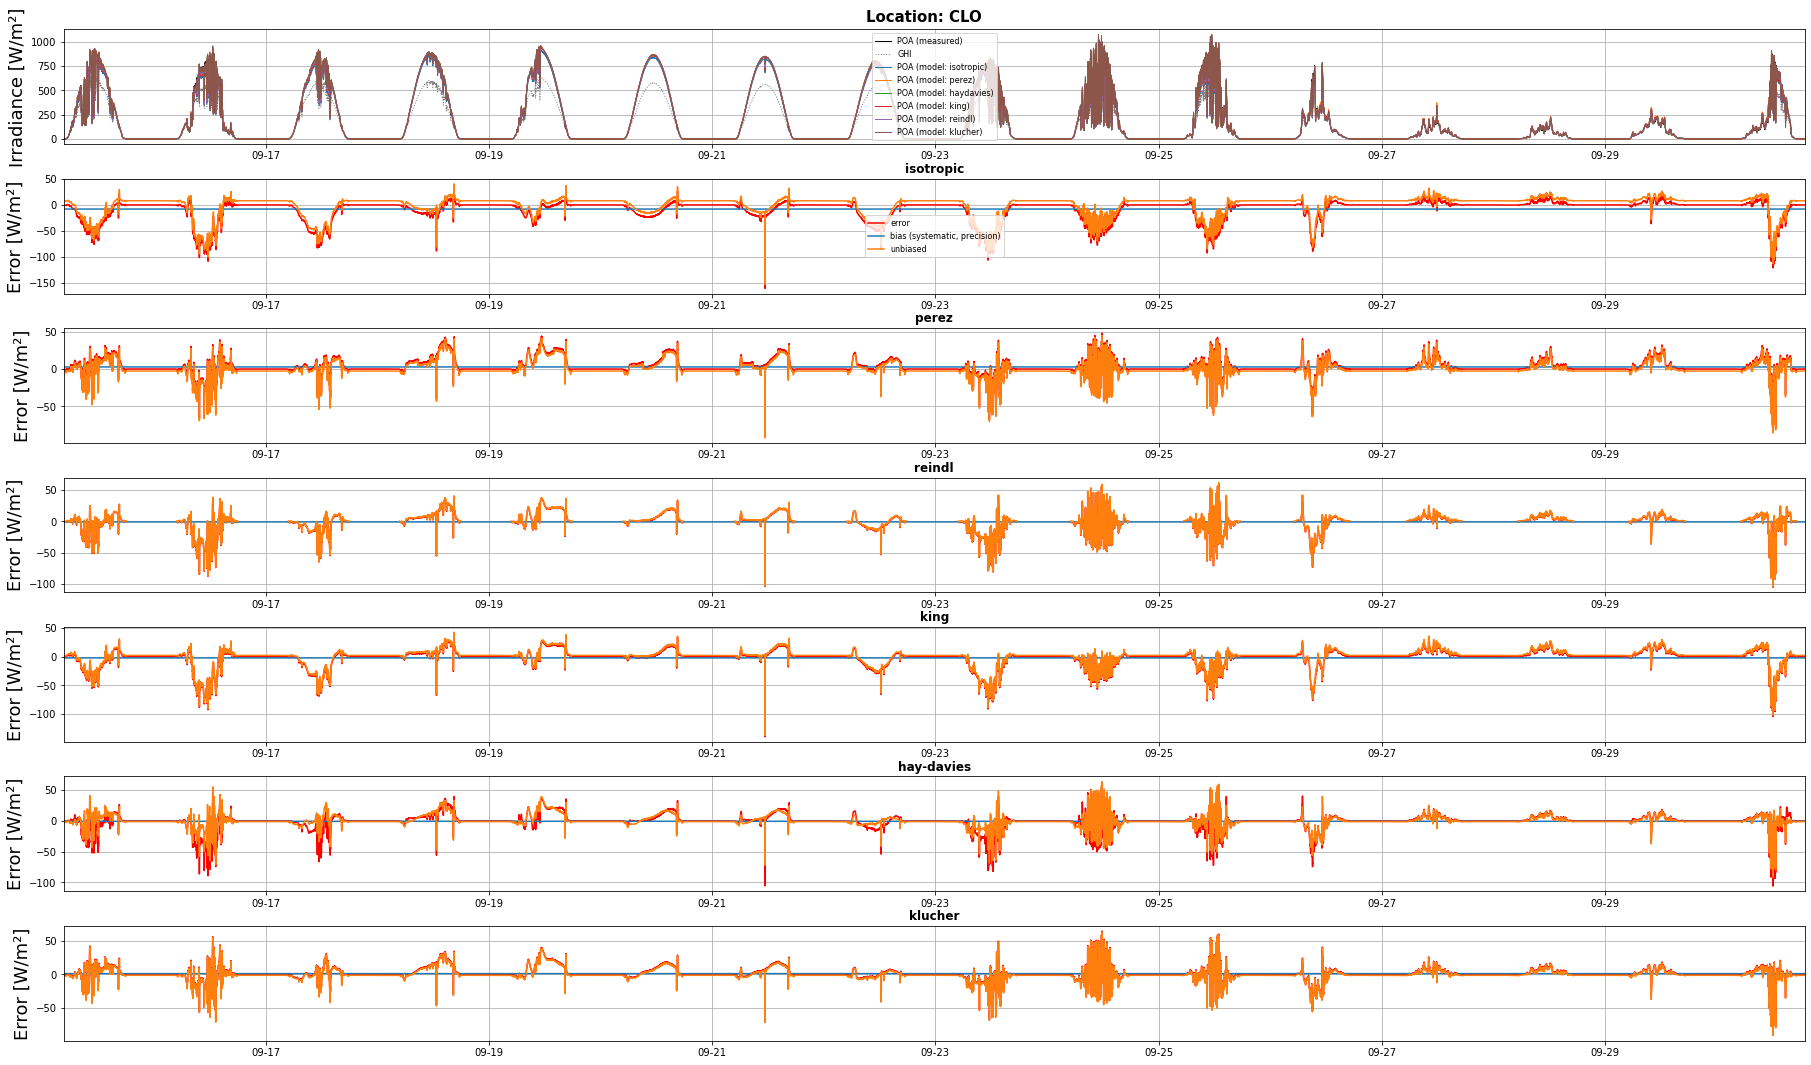

In [22]:
import matplotlib.dates as mdates
import datetime as dt

fig, axs = plt.subplots(7, figsize= (25,15))
fig.suptitle('Location: CLO',fontsize=15, weight='bold')
fig.tight_layout()

left = dt.datetime(2020, 9, 15,4,30)
right = dt.datetime(2020, 9, 30,19)

ax = axs[0]
fig.subplots_adjust(hspace=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(OLCLO_dts, OLCLO_GTI, label='POA (measured)',color='black', linewidth=1)
ax.plot(OLCLO_dts, OLCLO_ghi, label='GHI', color = 'grey', linestyle = 'dotted', linewidth=1)
ax.plot(OLCLO_dts, OLCLO_GTI_iso['poa_global'], label='POA (model: isotropic)', linewidth=1)
ax.plot(OLCLO_dts, OLCLO_GTI_perez['poa_global'], label='POA (model: perez)', linewidth=1)
ax.plot(OLCLO_dts, OLCLO_GTI_haydavies['poa_global'], label='POA (model: haydavies)', linewidth=1)
ax.plot(OLCLO_dts, OLCLO_GTI_king['poa_global'], label='POA (model: king)', linewidth=1)
ax.plot(OLCLO_dts, OLCLO_GTI_reindl['poa_global'], label='POA (model: reindl)', linewidth=1)
ax.plot(OLCLO_dts, OLCLO_GTI_klucher['poa_global'], label='POA (model: klucher)', linewidth=1)
#ax.tick_params(axis='x', labelrotation=45)
#ax.set_xlabel('Datetime',fontsize=18)
ax.set_ylabel('Irradiance [W/m²]', fontsize=18)
ax.legend(fontsize=8,loc='center')
ax.grid()

ax = axs[1]
ax.set_title('isotropic', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(OLCLO_dts, OLCLO_GTI_iso_err, 'r', label='error')
ax.plot(OLCLO_dts, np.ones(OLCLO_GTI_iso_err.size)*OLCLO_GTI_iso_bias, label='bias (systematic, precision)')
ax.plot(OLCLO_dts, OLCLO_GTI_iso_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.legend(fontsize=8,loc='center')
ax.grid()

ax = axs[2]
ax.set_title('perez', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(OLCLO_dts, OLCLO_GTI_perez_err, 'r', label='error')
ax.plot(OLCLO_dts, np.ones(OLCLO_GTI_perez_err.size)*OLCLO_GTI_perez_bias, label='bias (systematic, precision)')
ax.plot(OLCLO_dts, OLCLO_GTI_perez_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[3]
ax.set_title('reindl', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(OLCLO_dts, OLCLO_GTI_reindl_err, 'r', label='error')
ax.plot(OLCLO_dts, np.ones(OLCLO_GTI_reindl_err.size)*OLCLO_GTI_reindl_bias, label='bias (systematic, precision)')
ax.plot(OLCLO_dts, OLCLO_GTI_reindl_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[4]
ax.set_title('king', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(OLCLO_dts, OLCLO_GTI_king_err, 'r', label='error')
ax.plot(OLCLO_dts, np.ones(OLCLO_GTI_king_err.size)*OLCLO_GTI_king_bias, label='bias (systematic, precision)')
ax.plot(OLCLO_dts, OLCLO_GTI_king_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[5]
ax.set_title('hay-davies', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(OLCLO_dts, OLCLO_GTI_haydavies_err, 'r', label='error')
ax.plot(OLCLO_dts, np.ones(OLCLO_GTI_haydavies_err.size)*OLCLO_GTI_haydavies_bias, label='bias (systematic, precision)')
ax.plot(OLCLO_dts, OLCLO_GTI_klucher_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[6]
ax.set_title('klucher', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(OLCLO_dts, OLCLO_GTI_klucher_err, 'r', label='error')
ax.plot(OLCLO_dts, np.ones(OLCLO_GTI_klucher_err.size)*OLCLO_GTI_klucher_bias, label='bias (systematic, precision)')
ax.plot(OLCLO_dts, OLCLO_GTI_klucher_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

#plt.savefig('CLO.png',dpi=500)

### UOL

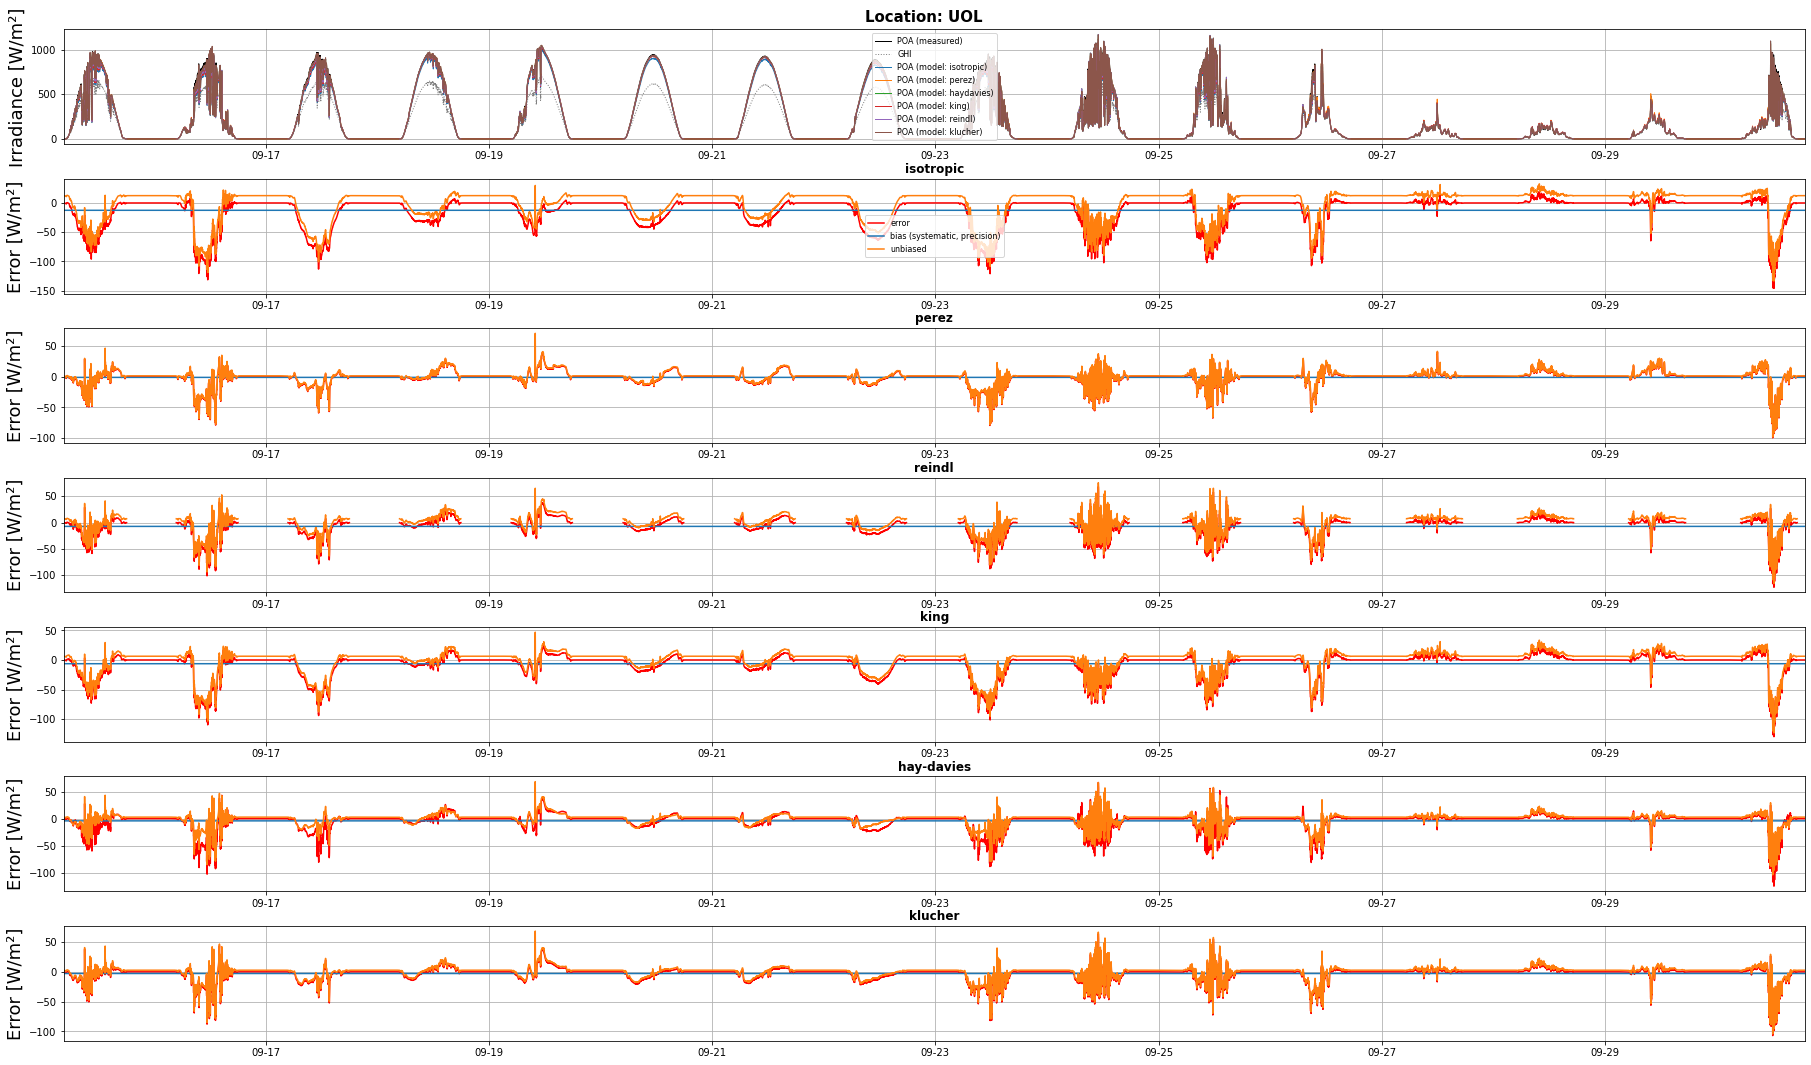

In [23]:
fig, axs = plt.subplots(7, figsize= (25,15))
fig.suptitle('Location: UOL',fontsize=15, weight='bold')
fig.tight_layout()

ax = axs[0]
fig.subplots_adjust(hspace=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(OLUOL_dts, OLUOL_GTI, label='POA (measured)',color='black', linewidth=1)
ax.plot(OLUOL_dts, OLUOL_ghi, label='GHI', color = 'grey', linestyle = 'dotted', linewidth=1)
ax.plot(OLUOL_dts, OLUOL_GTI_iso['poa_global'], label='POA (model: isotropic)', linewidth=1)
ax.plot(OLUOL_dts, OLUOL_GTI_perez['poa_global'], label='POA (model: perez)', linewidth=1)
ax.plot(OLUOL_dts, OLUOL_GTI_haydavies['poa_global'], label='POA (model: haydavies)', linewidth=1)
ax.plot(OLUOL_dts, OLUOL_GTI_king['poa_global'], label='POA (model: king)', linewidth=1)
ax.plot(OLUOL_dts, OLUOL_GTI_reindl['poa_global'], label='POA (model: reindl)', linewidth=1)
ax.plot(OLUOL_dts, OLUOL_GTI_klucher['poa_global'], label='POA (model: klucher)', linewidth=1)
#ax.tick_params(axis='x', labelrotation=45)
#ax.set_xlabel('Datetime',fontsize=18)
ax.set_ylabel('Irradiance [W/m²]', fontsize=18)
ax.legend(fontsize=8,loc='center')
ax.grid()

ax = axs[1]
ax.set_title('isotropic', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(OLUOL_dts, OLUOL_GTI_iso_err, 'r', label='error')
ax.plot(OLUOL_dts, np.ones(OLUOL_GTI_iso_err.size)*OLUOL_GTI_iso_bias, label='bias (systematic, precision)')
ax.plot(OLUOL_dts, OLUOL_GTI_iso_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.legend(fontsize=8,loc='center')
ax.grid()

ax = axs[2]
ax.set_title('perez', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(OLUOL_dts, OLUOL_GTI_perez_err, 'r', label='error')
ax.plot(OLUOL_dts, np.ones(OLUOL_GTI_perez_err.size)*OLUOL_GTI_perez_bias, label='bias (systematic, precision)')
ax.plot(OLUOL_dts, OLUOL_GTI_perez_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[3]
ax.set_title('reindl', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(OLUOL_dts, OLUOL_GTI_reindl_err, 'r', label='error')
ax.plot(OLUOL_dts, np.ones(OLUOL_GTI_reindl_err.size)*OLUOL_GTI_reindl_bias, label='bias (systematic, precision)')
ax.plot(OLUOL_dts, OLUOL_GTI_reindl_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[4]
ax.set_title('king', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(OLUOL_dts, OLUOL_GTI_king_err, 'r', label='error')
ax.plot(OLUOL_dts, np.ones(OLUOL_GTI_king_err.size)*OLUOL_GTI_king_bias, label='bias (systematic, precision)')
ax.plot(OLUOL_dts, OLUOL_GTI_king_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[5]
ax.set_title('hay-davies', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(OLUOL_dts, OLUOL_GTI_haydavies_err, 'r', label='error')
ax.plot(OLUOL_dts, np.ones(OLUOL_GTI_haydavies_err.size)*OLUOL_GTI_haydavies_bias, label='bias (systematic, precision)')
ax.plot(OLUOL_dts, OLUOL_GTI_klucher_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[6]
ax.set_title('klucher', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(OLUOL_dts, OLUOL_GTI_klucher_err, 'r', label='error')
ax.plot(OLUOL_dts, np.ones(OLUOL_GTI_klucher_err.size)*OLUOL_GTI_klucher_bias, label='bias (systematic, precision)')
ax.plot(OLUOL_dts, OLUOL_GTI_klucher_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

#plt.savefig('UOL.png',dpi=500)

### DON

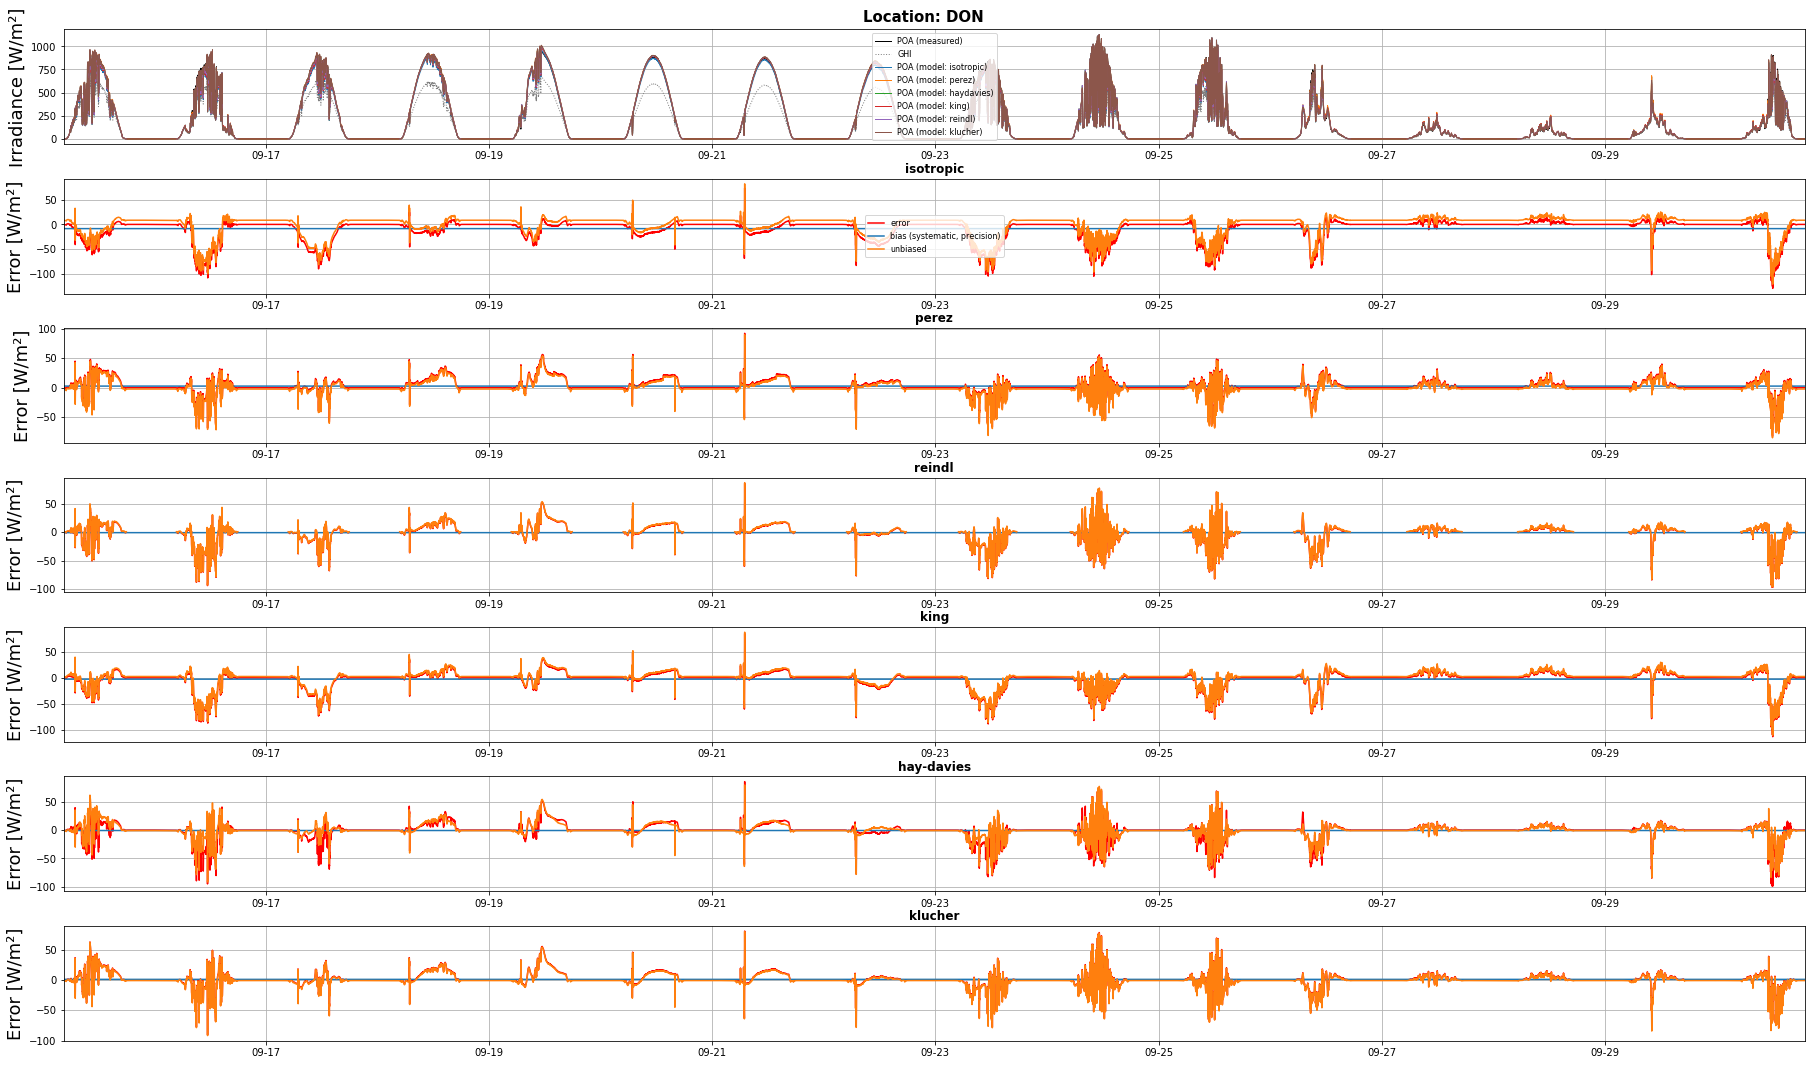

In [24]:

fig, axs = plt.subplots(7, figsize= (25,15))
fig.suptitle('Location: DON',fontsize=15, weight='bold')
fig.tight_layout()

ax = axs[0]
fig.subplots_adjust(hspace=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(OLDON_dts, OLDON_GTI, label='POA (measured)',color='black', linewidth=1)
ax.plot(OLDON_dts, OLDON_ghi, label='GHI', color = 'grey', linestyle = 'dotted', linewidth=1)
ax.plot(OLDON_dts, OLDON_GTI_iso['poa_global'], label='POA (model: isotropic)', linewidth=1)
ax.plot(OLDON_dts, OLDON_GTI_perez['poa_global'], label='POA (model: perez)', linewidth=1)
ax.plot(OLDON_dts, OLDON_GTI_haydavies['poa_global'], label='POA (model: haydavies)', linewidth=1)
ax.plot(OLDON_dts, OLDON_GTI_king['poa_global'], label='POA (model: king)', linewidth=1)
ax.plot(OLDON_dts, OLDON_GTI_reindl['poa_global'], label='POA (model: reindl)', linewidth=1)
ax.plot(OLDON_dts, OLDON_GTI_klucher['poa_global'], label='POA (model: klucher)', linewidth=1)
#ax.tick_params(axis='x', labelrotation=45)
#ax.set_xlabel('Datetime',fontsize=18)
ax.set_ylabel('Irradiance [W/m²]', fontsize=18)
ax.legend(fontsize=8,loc='center')
ax.grid()

ax = axs[1]
ax.set_title('isotropic', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(OLDON_dts, OLDON_GTI_iso_err, 'r', label='error')
ax.plot(OLDON_dts, np.ones(OLDON_GTI_iso_err.size)*OLDON_GTI_iso_bias, label='bias (systematic, precision)')
ax.plot(OLDON_dts, OLDON_GTI_iso_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.legend(fontsize=8,loc='center')
ax.grid()

ax = axs[2]
ax.set_title('perez', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(OLDON_dts, OLDON_GTI_perez_err, 'r', label='error')
ax.plot(OLDON_dts, np.ones(OLDON_GTI_perez_err.size)*OLDON_GTI_perez_bias, label='bias (systematic, precision)')
ax.plot(OLDON_dts, OLDON_GTI_perez_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[3]
ax.set_title('reindl', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(OLDON_dts, OLDON_GTI_reindl_err, 'r', label='error')
ax.plot(OLDON_dts, np.ones(OLDON_GTI_reindl_err.size)*OLDON_GTI_reindl_bias, label='bias (systematic, precision)')
ax.plot(OLDON_dts, OLDON_GTI_reindl_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[4]
ax.set_title('king', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(OLDON_dts, OLDON_GTI_king_err, 'r', label='error')
ax.plot(OLDON_dts, np.ones(OLDON_GTI_king_err.size)*OLDON_GTI_king_bias, label='bias (systematic, precision)')
ax.plot(OLDON_dts, OLDON_GTI_king_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[5]
ax.set_title('hay-davies', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(OLDON_dts, OLDON_GTI_haydavies_err, 'r', label='error')
ax.plot(OLDON_dts, np.ones(OLDON_GTI_haydavies_err.size)*OLDON_GTI_haydavies_bias, label='bias (systematic, precision)')
ax.plot(OLDON_dts, OLDON_GTI_klucher_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[6]
ax.set_title('klucher', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(OLDON_dts, OLDON_GTI_klucher_err, 'r', label='error')
ax.plot(OLDON_dts, np.ones(OLDON_GTI_klucher_err.size)*OLDON_GTI_klucher_bias, label='bias (systematic, precision)')
ax.plot(OLDON_dts, OLDON_GTI_klucher_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

#plt.savefig('DON.png',dpi=500)

## Single-day plots
### DON

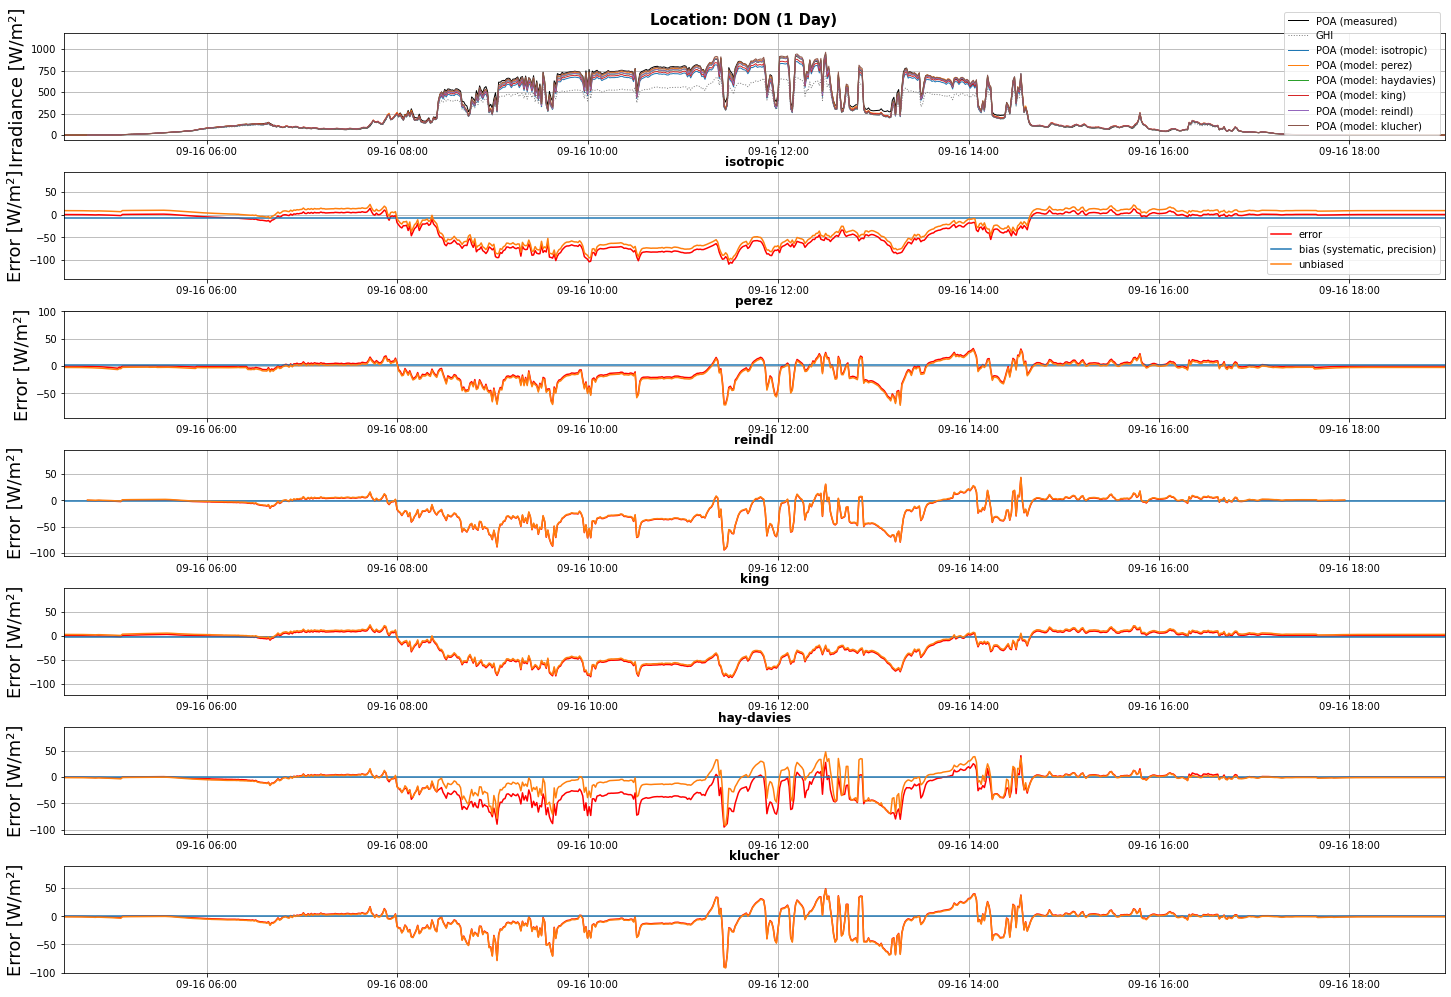

In [25]:
import datetime as dt
import matplotlib.dates as mdates
left = dt.datetime(2020, 9, 16,4,30)
right = dt.datetime(2020, 9, 16,19)


fig, axs = plt.subplots(7, figsize= (20,14))
fig.suptitle('Location: DON (1 Day)',fontsize=15,weight='bold')
fig.tight_layout()


ax = axs[0]
fig.subplots_adjust(hspace=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:00'))
ax.set_xlim([left,right])
ax.plot(OLDON_dts, OLDON_GTI, label='POA (measured)',color='black', linewidth=1)
ax.plot(OLDON_dts, OLDON_ghi, label='GHI', color = 'grey', linestyle = 'dotted', linewidth=1)
ax.plot(OLDON_dts, OLDON_GTI_iso['poa_global'], label='POA (model: isotropic)', linewidth=1)
ax.plot(OLDON_dts, OLDON_GTI_perez['poa_global'], label='POA (model: perez)', linewidth=1)
ax.plot(OLDON_dts, OLDON_GTI_haydavies['poa_global'], label='POA (model: haydavies)', linewidth=1)
ax.plot(OLDON_dts, OLDON_GTI_king['poa_global'], label='POA (model: king)', linewidth=1)
ax.plot(OLDON_dts, OLDON_GTI_reindl['poa_global'], label='POA (model: reindl)', linewidth=1)
ax.plot(OLDON_dts, OLDON_GTI_klucher['poa_global'], label='POA (model: klucher)', linewidth=1)
#ax.tick_params(axis='x', labelrotation=45)
#ax.set_xlabel('Datetime',fontsize=18)
ax.set_ylabel('Irradiance [W/m²]', fontsize=18)
ax.legend(fontsize=10,loc='lower right')
ax.grid()

ax = axs[1]
ax.set_title('isotropic',weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:00'))
ax.set_xlim([left,right])
ax.plot(OLDON_dts, OLDON_GTI_iso_err, 'r', label='error')
ax.plot(OLDON_dts, np.ones(OLDON_GTI_iso_err.size)*OLDON_GTI_iso_bias, label='bias (systematic, precision)')
ax.plot(OLDON_dts, OLDON_GTI_iso_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.legend(fontsize=10,loc='lower right')
ax.grid()

ax = axs[2]
ax.set_title('perez',weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:00'))
ax.set_xlim([left,right])
ax.plot(OLDON_dts, OLDON_GTI_perez_err, 'r', label='error')
ax.plot(OLDON_dts, np.ones(OLDON_GTI_perez_err.size)*OLDON_GTI_perez_bias, label='bias (systematic, precision)')
ax.plot(OLDON_dts, OLDON_GTI_perez_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[3]
ax.set_title('reindl',weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:00'))
ax.set_xlim([left,right])
ax.plot(OLDON_dts, OLDON_GTI_reindl_err, 'r', label='error')
ax.plot(OLDON_dts, np.ones(OLDON_GTI_reindl_err.size)*OLDON_GTI_reindl_bias, label='bias (systematic, precision)')
ax.plot(OLDON_dts, OLDON_GTI_reindl_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[4]
ax.set_title('king',weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:00'))
ax.set_xlim([left,right])
ax.plot(OLDON_dts, OLDON_GTI_king_err, 'r', label='error')
ax.plot(OLDON_dts, np.ones(OLDON_GTI_king_err.size)*OLDON_GTI_king_bias, label='bias (systematic, precision)')
ax.plot(OLDON_dts, OLDON_GTI_king_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[5]
ax.set_title('hay-davies',weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:00'))
ax.set_xlim([left,right])
ax.plot(OLDON_dts, OLDON_GTI_haydavies_err, 'r', label='error')
ax.plot(OLDON_dts, np.ones(OLDON_GTI_haydavies_err.size)*OLDON_GTI_haydavies_bias, label='bias (systematic, precision)')
ax.plot(OLDON_dts, OLDON_GTI_klucher_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[6]
ax.set_title('klucher',weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:00'))
ax.set_xlim([left,right])
ax.plot(OLDON_dts, OLDON_GTI_klucher_err, 'r', label='error')
ax.plot(OLDON_dts, np.ones(OLDON_GTI_klucher_err.size)*OLDON_GTI_klucher_bias, label='bias (systematic, precision)')
ax.plot(OLDON_dts, OLDON_GTI_klucher_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

#plt.savefig('DON-09-16.png',dpi=500)

### UOL

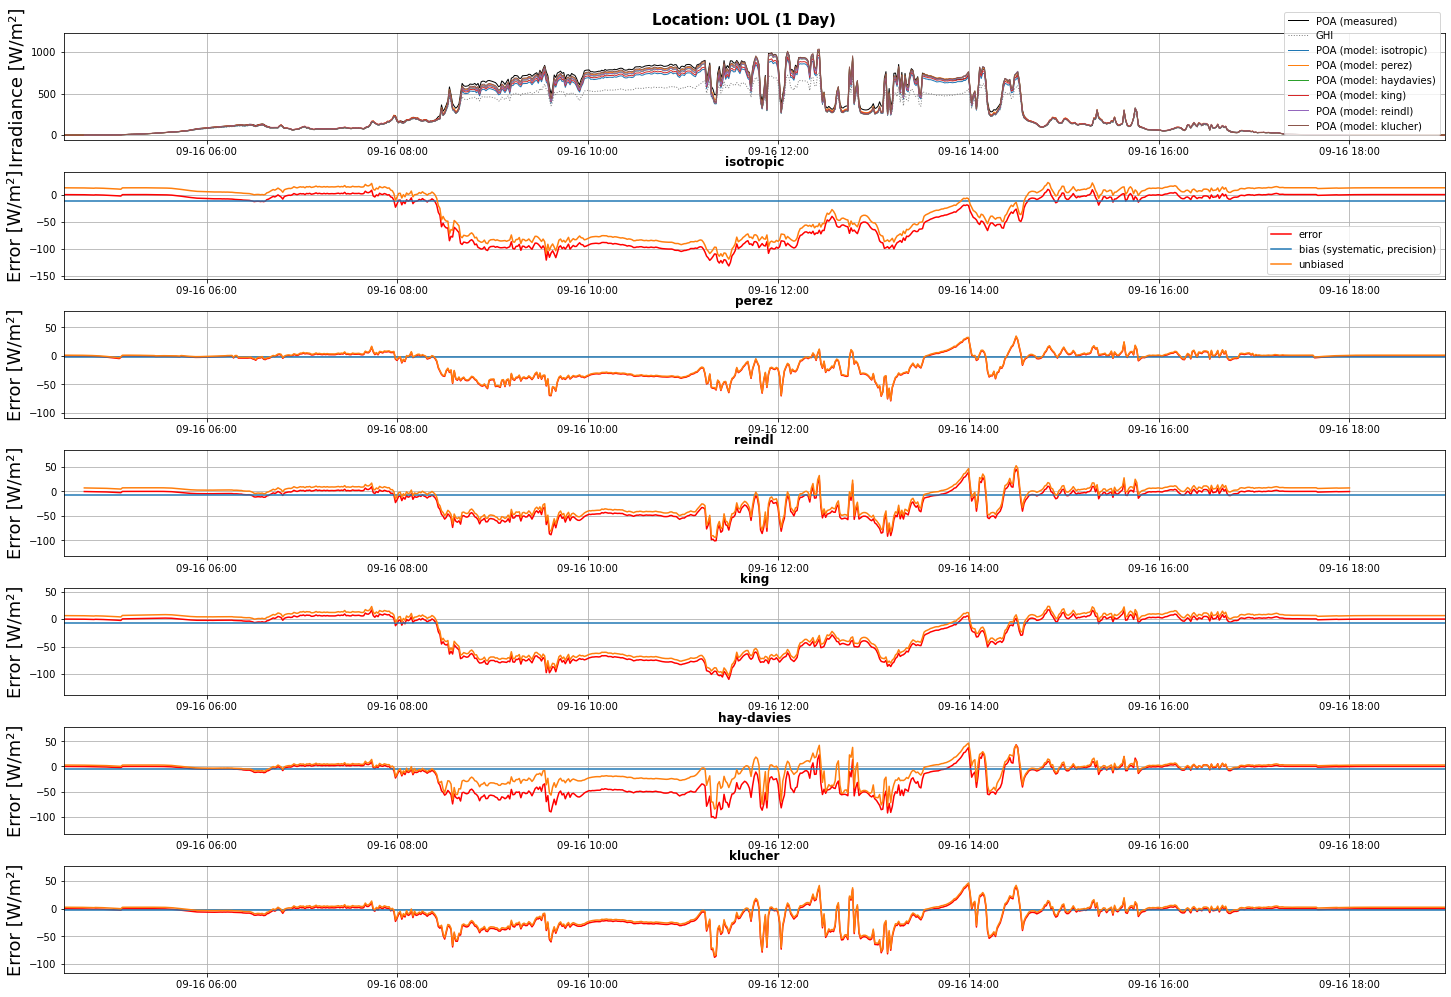

In [26]:
fig, axs = plt.subplots(7, figsize= (20,14))
fig.suptitle('Location: UOL (1 Day)',fontsize=15,weight='bold')
fig.tight_layout()


ax = axs[0]
fig.subplots_adjust(hspace=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:00'))
ax.set_xlim([left,right])
ax.plot(OLUOL_dts, OLUOL_GTI, label='POA (measured)',color='black', linewidth=1)
ax.plot(OLUOL_dts, OLUOL_ghi, label='GHI', color = 'grey', linestyle = 'dotted', linewidth=1)
ax.plot(OLUOL_dts, OLUOL_GTI_iso['poa_global'], label='POA (model: isotropic)', linewidth=1)
ax.plot(OLUOL_dts, OLUOL_GTI_perez['poa_global'], label='POA (model: perez)', linewidth=1)
ax.plot(OLUOL_dts, OLUOL_GTI_haydavies['poa_global'], label='POA (model: haydavies)', linewidth=1)
ax.plot(OLUOL_dts, OLUOL_GTI_king['poa_global'], label='POA (model: king)', linewidth=1)
ax.plot(OLUOL_dts, OLUOL_GTI_reindl['poa_global'], label='POA (model: reindl)', linewidth=1)
ax.plot(OLUOL_dts, OLUOL_GTI_klucher['poa_global'], label='POA (model: klucher)', linewidth=1)
#ax.tick_params(axis='x', labelrotation=45)
#ax.set_xlabel('Datetime',fontsize=18)
ax.set_ylabel('Irradiance [W/m²]', fontsize=18)
ax.legend(fontsize=10,loc='lower right')
ax.grid()

ax = axs[1]
ax.set_title('isotropic',weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:00'))
ax.set_xlim([left,right])
ax.plot(OLUOL_dts, OLUOL_GTI_iso_err, 'r', label='error')
ax.plot(OLUOL_dts, np.ones(OLUOL_GTI_iso_err.size)*OLUOL_GTI_iso_bias, label='bias (systematic, precision)')
ax.plot(OLUOL_dts, OLUOL_GTI_iso_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.legend(fontsize=10,loc='lower right')
ax.grid()

ax = axs[2]
ax.set_title('perez',weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:00'))
ax.set_xlim([left,right])
ax.plot(OLUOL_dts, OLUOL_GTI_perez_err, 'r', label='error')
ax.plot(OLUOL_dts, np.ones(OLUOL_GTI_perez_err.size)*OLUOL_GTI_perez_bias, label='bias (systematic, precision)')
ax.plot(OLUOL_dts, OLUOL_GTI_perez_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[3]
ax.set_title('reindl',weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:00'))
ax.set_xlim([left,right])
ax.plot(OLUOL_dts, OLUOL_GTI_reindl_err, 'r', label='error')
ax.plot(OLUOL_dts, np.ones(OLUOL_GTI_reindl_err.size)*OLUOL_GTI_reindl_bias, label='bias (systematic, precision)')
ax.plot(OLUOL_dts, OLUOL_GTI_reindl_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[4]
ax.set_title('king',weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:00'))
ax.set_xlim([left,right])
ax.plot(OLUOL_dts, OLUOL_GTI_king_err, 'r', label='error')
ax.plot(OLUOL_dts, np.ones(OLUOL_GTI_king_err.size)*OLUOL_GTI_king_bias, label='bias (systematic, precision)')
ax.plot(OLUOL_dts, OLUOL_GTI_king_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[5]
ax.set_title('hay-davies',weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:00'))
ax.set_xlim([left,right])
ax.plot(OLUOL_dts, OLUOL_GTI_haydavies_err, 'r', label='error')
ax.plot(OLUOL_dts, np.ones(OLUOL_GTI_haydavies_err.size)*OLUOL_GTI_haydavies_bias, label='bias (systematic, precision)')
ax.plot(OLUOL_dts, OLUOL_GTI_klucher_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[6]
ax.set_title('klucher',weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:00'))
ax.set_xlim([left,right])
ax.plot(OLUOL_dts, OLUOL_GTI_klucher_err, 'r', label='error')
ax.plot(OLUOL_dts, np.ones(OLUOL_GTI_klucher_err.size)*OLUOL_GTI_klucher_bias, label='bias (systematic, precision)')
ax.plot(OLUOL_dts, OLUOL_GTI_klucher_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

#plt.savefig('UOL-09-16.png',dpi=500)

### CLO

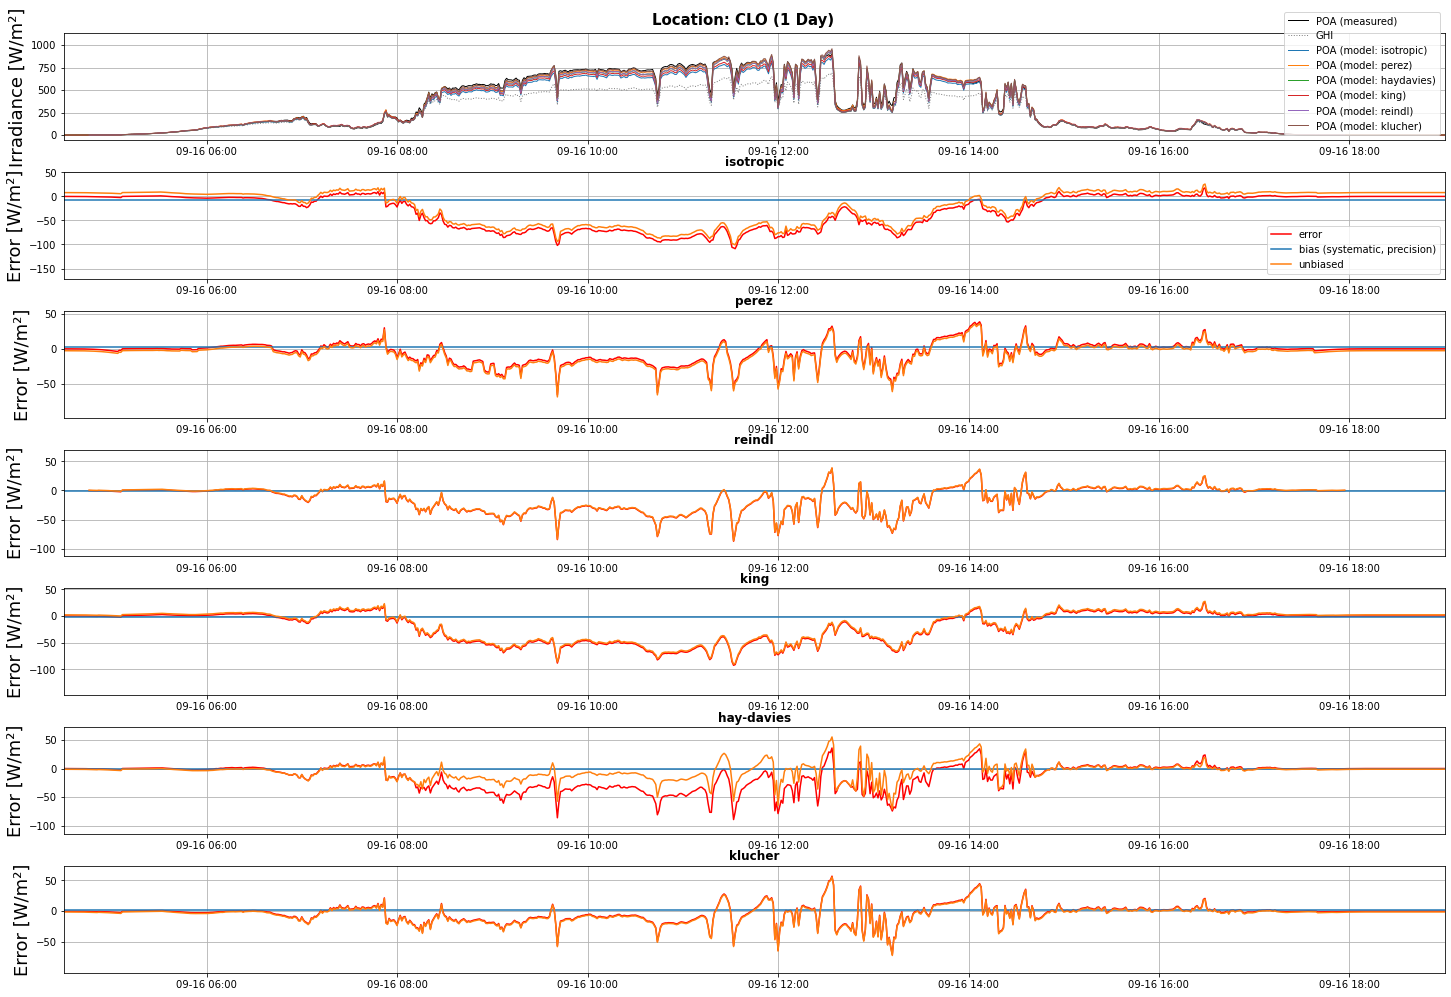

In [27]:
fig, axs = plt.subplots(7, figsize= (20,14))
fig.suptitle('Location: CLO (1 Day)',fontsize=15,weight='bold')
fig.tight_layout()


ax = axs[0]
fig.subplots_adjust(hspace=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:00'))
ax.set_xlim([left,right])
ax.plot(OLCLO_dts, OLCLO_GTI, label='POA (measured)',color='black', linewidth=1)
ax.plot(OLCLO_dts, OLCLO_ghi, label='GHI', color = 'grey', linestyle = 'dotted', linewidth=1)
ax.plot(OLCLO_dts, OLCLO_GTI_iso['poa_global'], label='POA (model: isotropic)', linewidth=1)
ax.plot(OLCLO_dts, OLCLO_GTI_perez['poa_global'], label='POA (model: perez)', linewidth=1)
ax.plot(OLCLO_dts, OLCLO_GTI_haydavies['poa_global'], label='POA (model: haydavies)', linewidth=1)
ax.plot(OLCLO_dts, OLCLO_GTI_king['poa_global'], label='POA (model: king)', linewidth=1)
ax.plot(OLCLO_dts, OLCLO_GTI_reindl['poa_global'], label='POA (model: reindl)', linewidth=1)
ax.plot(OLCLO_dts, OLCLO_GTI_klucher['poa_global'], label='POA (model: klucher)', linewidth=1)
#ax.tick_params(axis='x', labelrotation=45)
#ax.set_xlabel('Datetime',fontsize=18)
ax.set_ylabel('Irradiance [W/m²]', fontsize=18)
ax.legend(fontsize=10,loc='lower right')
ax.grid()

ax = axs[1]
ax.set_title('isotropic',weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:00'))
ax.set_xlim([left,right])
ax.plot(OLCLO_dts, OLCLO_GTI_iso_err, 'r', label='error')
ax.plot(OLCLO_dts, np.ones(OLCLO_GTI_iso_err.size)*OLCLO_GTI_iso_bias, label='bias (systematic, precision)')
ax.plot(OLCLO_dts, OLCLO_GTI_iso_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.legend(fontsize=10,loc='lower right')
ax.grid()

ax = axs[2]
ax.set_title('perez',weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:00'))
ax.set_xlim([left,right])
ax.plot(OLCLO_dts, OLCLO_GTI_perez_err, 'r', label='error')
ax.plot(OLCLO_dts, np.ones(OLCLO_GTI_perez_err.size)*OLCLO_GTI_perez_bias, label='bias (systematic, precision)')
ax.plot(OLCLO_dts, OLCLO_GTI_perez_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[3]
ax.set_title('reindl',weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:00'))
ax.set_xlim([left,right])
ax.plot(OLCLO_dts, OLCLO_GTI_reindl_err, 'r', label='error')
ax.plot(OLCLO_dts, np.ones(OLCLO_GTI_reindl_err.size)*OLCLO_GTI_reindl_bias, label='bias (systematic, precision)')
ax.plot(OLCLO_dts, OLCLO_GTI_reindl_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[4]
ax.set_title('king',weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:00'))
ax.set_xlim([left,right])
ax.plot(OLCLO_dts, OLCLO_GTI_king_err, 'r', label='error')
ax.plot(OLCLO_dts, np.ones(OLCLO_GTI_king_err.size)*OLCLO_GTI_king_bias, label='bias (systematic, precision)')
ax.plot(OLCLO_dts, OLCLO_GTI_king_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[5]
ax.set_title('hay-davies',weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:00'))
ax.set_xlim([left,right])
ax.plot(OLCLO_dts, OLCLO_GTI_haydavies_err, 'r', label='error')
ax.plot(OLCLO_dts, np.ones(OLCLO_GTI_haydavies_err.size)*OLCLO_GTI_haydavies_bias, label='bias (systematic, precision)')
ax.plot(OLCLO_dts, OLCLO_GTI_klucher_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[6]
ax.set_title('klucher',weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:00'))
ax.set_xlim([left,right])
ax.plot(OLCLO_dts, OLCLO_GTI_klucher_err, 'r', label='error')
ax.plot(OLCLO_dts, np.ones(OLCLO_GTI_klucher_err.size)*OLCLO_GTI_klucher_bias, label='bias (systematic, precision)')
ax.plot(OLCLO_dts, OLCLO_GTI_klucher_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

#plt.savefig('CLO-09-16.png',dpi=500)

## Optimal tilt by klucher @ CLO

In [28]:
PV_tilt = np.arange(10,90,5)
PV_azimuth = 180 

mean_energy_klucher = []
mean_energy_king = []
mean_energy_reindl = []
mean_energy_iso = []
mean_energy_haydavies = []

for tilt in PV_tilt:
    OLCLO_GTI_iso = pvlib.irradiance.get_total_irradiance(tilt, PV_azimuth, OLCLO_solpos['apparent_zenith'], OLCLO_solpos['azimuth'], OLCLO_dni, OLCLO_ghi, OLCLO_dhi, model='isotropic') #SZA,SAA
    OLCLO_GTI_reindl = pvlib.irradiance.get_total_irradiance(tilt, PV_azimuth, OLCLO_solpos['apparent_zenith'], OLCLO_solpos['azimuth'], OLCLO_dni, OLCLO_ghi, OLCLO_dhi, model='reindl',dni_extra = 1366)
    OLCLO_GTI_klucher = pvlib.irradiance.get_total_irradiance(tilt, PV_azimuth, OLCLO_solpos['apparent_zenith'], OLCLO_solpos['azimuth'], OLCLO_dni, OLCLO_ghi, OLCLO_dhi, model='klucher',dni_extra = 1366)
    OLCLO_GTI_haydavies = pvlib.irradiance.get_total_irradiance(tilt, PV_azimuth, OLCLO_solpos['apparent_zenith'], OLCLO_solpos['azimuth'], OLCLO_dni, OLCLO_ghi, OLCLO_dhi, model='haydavies',dni_extra = 1366)
    OLCLO_GTI_king = pvlib.irradiance.get_total_irradiance(tilt, PV_azimuth, OLCLO_solpos['apparent_zenith'], OLCLO_solpos['azimuth'], OLCLO_dni, OLCLO_ghi, OLCLO_dhi, model='king',dni_extra = 1366)

    mean_energy_iso.append(sum(1/60 * OLCLO_GTI_iso['poa_global'])/1000) #kWh/m²
    mean_energy_reindl.append(sum(1/60 * OLCLO_GTI_reindl['poa_global'])/1000)
    mean_energy_klucher.append(sum(1/60 * OLCLO_GTI_klucher['poa_global'])/1000)
    mean_energy_haydavies.append(sum(1/60 * OLCLO_GTI_haydavies['poa_global'])/1000)
    mean_energy_king.append(sum(1/60 * OLCLO_GTI_king['poa_global'])/1000)



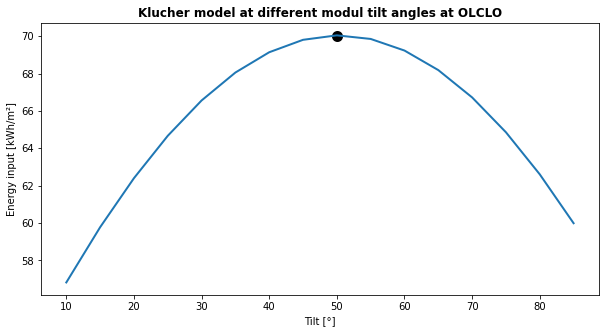

In [29]:
plt.figure(figsize=(10,5))
plt.title('Klucher model at different modul tilt angles at OLCLO',weight='bold')
plt.xlabel('Tilt [°]')
plt.ylabel('Energy input [kWh/m²]')
plt.scatter(50,70,linewidth=5,color='black')
plt.plot(PV_tilt,mean_energy_klucher,linewidth=2)

plt.savefig('tilt.png',dpi=200)

# ALMERIA DATA

In [30]:
ALM = h5py.File("C:/Users/Andre/Sync/Studium/AKTUELL SoSe 22/Adv. Solar Energy Meteorology/ProjektWork/solenmet_ss22_group2/ALM/GTI_measurement_at_ARI_ca_20862_2020-09-15--2020-10-01.h5", 'r')
ALM_add = h5py.File("C:/Users/Andre/Sync/Studium/AKTUELL SoSe 22/Adv. Solar Energy Meteorology/ProjektWork/solenmet_ss22_group2/ALM/PSA-HP_10062_2020-09-15--2020-10-01.h5",'r')
# OLCLO_lat = OLCLO_20_09_15.attrs['latitude'] # always 53.112004
# OLCLO_lon = OLCLO_20_09_15.attrs['longitude'] # always 8.210042
ALM.keys()
ALM_add.keys()

<KeysViewHDF5 ['dhi', 'dni', 'ghi', 'rh', 't_air', 'timestamp']>

In [31]:
from datetime import datetime, timedelta
## datetime

#df_naive = pd.DataFrame(ALM['timestamp'][::6])
#print(df_naive)
#df_naive.tz_localize(tz='Europe/Paris')

#df_aware = pd.to_datetime(df_naive, unit='s').dt.tz_localize('UTC').dt.tz_convert('Europe/Berlin')
#df_aware = pd.DatetimeIndex(pd.to_datetime(df_naive,unit='s')).tz_localize('UTC').tz_convert('Europe/Berlin')
#df_aware = pd.to_datetime(df_naive, unit='s').apply(lambda x: x.tz_localize('UTC').tz_convert('Europe/Berlin'))
#df_naive.tz_localize('UTC').tz_convert('Europe/Berlin')
#print(df_naive)
#df_aware = df_naive.tz_localize('Europe/Warsaw')
#tz_aware = tz_naive.tz_localize(tz='US/Eastern')
#print(df_aware)

In [41]:
#ts = pd.Timestamp('2020-03-14T15:32:52.192548651', tz='UTC')
#tz europe_berlin
# pd_to_timestand

#df= pd.DataFrame(ALM['timestamp'][::6])

#ALM_dts1= pd.Timestamp(df, unit='s', tz='Europe/Berlin')

#ALM_dts1 = pd.Timestamp(df,tz='Europe/Berlin')

ALM_dts = ALM['timestamp'][::6]
ALM_dts = ALM_dts.astype('datetime64[s]')

#print(ALM_dts1[1] + dt.timedelta(hours=1))
#ALM_dts = ALM_dts1 + timedelta(hours=1)



## data
ALM_GTI_20S = ALM['GTI_t20_S'][::6]
ALM_GTI_30S = ALM['GTI_t30_S'][::6]
ALM_GTI_45SW = ALM['GTI_t45_SW'][::6]

ALM_dhi = ALM_add['dhi'][:-1:6]
ALM_dni = ALM_add['dni'][:-1:6]
ALM_ghi = ALM_add['ghi'][:-1:6]
ALM_t = ALM_add['t_air'][:-1:6]
print(ALM_dts[2]-ALM_dts[1])
#print(df)

60 seconds


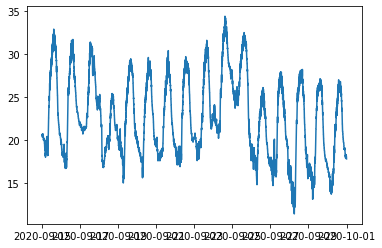

In [260]:
plt.plot(ALM_dts,ALM_t)

In [79]:
ALM_lat = 37.09484003045860
ALM_lon = -2.3580777659444516

ALM_solpos = pvlib.solarposition.get_solarposition(ALM_dts, ALM_lat, ALM_lon)

ALM_dni_extra = pvlib.irradiance.get_extra_radiation(pd.DatetimeIndex(ALM_dts))
ALM_airmass = pvlib.atmosphere.get_relative_airmass(ALM_solpos['apparent_zenith'])

PV_tilt = 20
PV_azimuth = 180

ALM_GTI_20S_iso = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, ALM_solpos['apparent_zenith'], ALM_solpos['azimuth'], ALM_dni, ALM_ghi, ALM_dhi, model='isotropic') #SZA,SAA
ALM_GTI_20S_klucher = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, ALM_solpos['apparent_zenith'], ALM_solpos['azimuth'], ALM_dni, ALM_ghi, ALM_dhi, model='klucher',dni_extra = 1366)
ALM_GTI_20S_king = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, ALM_solpos['apparent_zenith'], ALM_solpos['azimuth'], ALM_dni, ALM_ghi, ALM_dhi, model='king')
ALM_GTI_20S_perez = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, ALM_solpos['apparent_zenith'], ALM_solpos['azimuth'], ALM_dni, ALM_ghi, ALM_dhi, airmass=ALM_airmass, model='perez', model_perez='allsitescomposite1990', dni_extra = 1366)
ALM_GTI_20S_reindl = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, ALM_solpos['apparent_zenith'], ALM_solpos['azimuth'], ALM_dni, ALM_ghi, ALM_dhi, model='reindl',dni_extra = 1366)
ALM_GTI_20S_haydavies = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, ALM_solpos['apparent_zenith'], ALM_solpos['azimuth'], ALM_dni, ALM_ghi, ALM_dhi, model='haydavies',dni_extra = 1366)

PV_tilt = 30
PV_azimuth = 180

ALM_GTI_30S_iso = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, ALM_solpos['apparent_zenith'], ALM_solpos['azimuth'], ALM_dni, ALM_ghi, ALM_dhi, model='isotropic') #SZA,SAA
ALM_GTI_30S_klucher = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, ALM_solpos['apparent_zenith'], ALM_solpos['azimuth'], ALM_dni, ALM_ghi, ALM_dhi, model='klucher',dni_extra = 1366)
ALM_GTI_30S_king = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, ALM_solpos['apparent_zenith'], ALM_solpos['azimuth'], ALM_dni, ALM_ghi, ALM_dhi, model='king')
ALM_GTI_30S_perez = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, ALM_solpos['apparent_zenith'], ALM_solpos['azimuth'], ALM_dni, ALM_ghi, ALM_dhi, airmass=ALM_airmass, model='perez', model_perez='allsitescomposite1990', dni_extra = 1366)
ALM_GTI_30S_reindl = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, ALM_solpos['apparent_zenith'], ALM_solpos['azimuth'], ALM_dni, ALM_ghi, ALM_dhi, model='reindl',dni_extra = 1366)
ALM_GTI_30S_haydavies = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, ALM_solpos['apparent_zenith'], ALM_solpos['azimuth'], ALM_dni, ALM_ghi, ALM_dhi, model='haydavies',dni_extra = 1366)

PV_tilt = 45
PV_azimuth = 180

ALM_GTI_45SW_iso = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, ALM_solpos['apparent_zenith'], ALM_solpos['azimuth'], ALM_dni, ALM_ghi, ALM_dhi, model='isotropic') #SZA,SAA
ALM_GTI_45SW_klucher = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, ALM_solpos['apparent_zenith'], ALM_solpos['azimuth'], ALM_dni, ALM_ghi, ALM_dhi, model='klucher',dni_extra = 1366)
ALM_GTI_45SW_king = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, ALM_solpos['apparent_zenith'], ALM_solpos['azimuth'], ALM_dni, ALM_ghi, ALM_dhi, model='king')
ALM_GTI_45SW_perez = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, ALM_solpos['apparent_zenith'], ALM_solpos['azimuth'], ALM_dni, ALM_ghi, ALM_dhi, airmass=ALM_airmass, model='perez', model_perez='allsitescomposite1990', dni_extra = 1366)
ALM_GTI_45SW_reindl = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, ALM_solpos['apparent_zenith'], ALM_solpos['azimuth'], ALM_dni, ALM_ghi, ALM_dhi, model='reindl',dni_extra = 1366)
ALM_GTI_45SW_haydavies = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, ALM_solpos['apparent_zenith'], ALM_solpos['azimuth'], ALM_dni, ALM_ghi, ALM_dhi, model='haydavies',dni_extra = 1366)



C:\Users\Andre\anaconda3\lib\site-packages\pvlib\solarposition.py:365: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  unixtime = np.array(time.astype(np.int64)/10**9)
C:\Users\Andre\anaconda3\lib\site-packages\pvlib\irradiance.py:683: RuntimeWarning: divide by zero encountered in true_divide
  F = 1 - ((dhi / ghi) ** 2)
C:\Users\Andre\anaconda3\lib\site-packages\pvlib\irradiance.py:1056: RuntimeWarning: divide by zero encountered in true_divide
  eps = ((dhi + dni) / dhi + kappa * (z ** 3)) / (1 + kappa * (z ** 3))
C:\Users\Andre\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


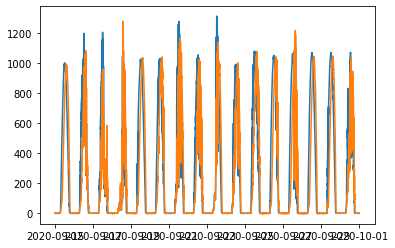

In [80]:
plt.plot(ALM_dts,ALM_GTI_45SW_perez['poa_global'])
plt.plot(ALM_dts,ALM_GTI_45SW)

### Error ALMERIA
### 20S

In [81]:
ALM_GTI_20S_iso_err = ALM_GTI_20S_iso['poa_global'] - ALM_GTI_20S
ALM_GTI_20S_perez_err = ALM_GTI_20S_perez['poa_global'] - ALM_GTI_20S
ALM_GTI_20S_reindl_err = ALM_GTI_20S_reindl['poa_global'] - ALM_GTI_20S 
ALM_GTI_20S_king_err = ALM_GTI_20S_king['poa_global'] - ALM_GTI_20S
ALM_GTI_20S_haydavies_err = ALM_GTI_20S_haydavies['poa_global'] - ALM_GTI_20S 
ALM_GTI_20S_klucher_err = ALM_GTI_20S_klucher['poa_global'] - ALM_GTI_20S
print(ALM_GTI_20S_klucher_err)

## Mean Bias Error MBE
# Bias => Systematic error : on average, the values of the model underestimate the reference by X W/m² (precision of my model)
ALM_GTI_20S_iso_bias = np.nanmean(ALM_GTI_20S_iso_err)
ALM_GTI_20S_perez_bias = np.nanmean(ALM_GTI_20S_perez_err)
ALM_GTI_20S_reindl_bias = np.nanmean(ALM_GTI_20S_reindl_err)
ALM_GTI_20S_king_bias = np.nanmean(ALM_GTI_20S_king_err)
ALM_GTI_20S_haydavies_bias = np.nanmean(ALM_GTI_20S_haydavies_err)
ALM_GTI_20S_klucher_bias = np.nanmean(ALM_GTI_20S_klucher_err)


## We can remove the bias (or systematic error) from the data :
ALM_GTI_20S_iso_err_unbiased = ALM_GTI_20S_iso_err - ALM_GTI_20S_iso_bias
ALM_GTI_20S_perez_err_unbiased = ALM_GTI_20S_perez_err - ALM_GTI_20S_perez_bias
ALM_GTI_20S_reindl_err_unbiased = ALM_GTI_20S_reindl_err - ALM_GTI_20S_reindl_bias
ALM_GTI_20S_king_err_unbiased = ALM_GTI_20S_king_err - ALM_GTI_20S_king_bias
ALM_GTI_20S_haydavies_err_unbiased = ALM_GTI_20S_haydavies_err - ALM_GTI_20S_haydavies_bias
ALM_GTI_20S_klucher_err_unbiased = ALM_GTI_20S_klucher_err - ALM_GTI_20S_klucher_bias

## standard deviation---------------------------------------------------------------------------------------------------
# The standard error provides information on the spread of the errors around their mean value (accuracy).
# only effect of the spread of the values around the truth removing the bias (systematic error)
ALM_GTI_20S_iso_std = np.nanstd(ALM_GTI_20S_iso_err)
ALM_GTI_20S_perez_std = np.nanstd(ALM_GTI_20S_perez_err)
ALM_GTI_20S_reindl_std = np.nanstd(ALM_GTI_20S_reindl_err)
ALM_GTI_20S_king_std = np.nanstd(ALM_GTI_20S_king_err)
ALM_GTI_20S_haydavies_std = np.nanstd(ALM_GTI_20S_haydavies_err)
ALM_GTI_20S_klucher_std = np.nanstd(ALM_GTI_20S_klucher_err)

## Root mean Square Error (RMSE)-----------------------------------------------------------------------------------------
# RMSE is a particular case of standard error => when bias = 0.
# RMSE is the standard deviation of the resitual error, that is, how spread are the error around the best fit.

# It accounts for the proportions of the systematic and random errors in a data set
# Well suited to compare different models/prediction/measurements between them selfs (how well they perform )

ALM_GTI_20S_iso_RMSE = np.sqrt(1 / ALM_GTI_20S_iso_err.size  * np.sum(ALM_GTI_20S_iso_err**2))
ALM_GTI_20S_perez_RMSE = np.sqrt(1 / ALM_GTI_20S_perez_err.size  * np.sum(ALM_GTI_20S_perez_err**2))
ALM_GTI_20S_reindl_RMSE = np.sqrt(1 / ALM_GTI_20S_reindl_err.size  * np.sum(ALM_GTI_20S_reindl_err**2))
ALM_GTI_20S_king_RMSE = np.sqrt(1 / ALM_GTI_20S_king_err.size  * np.sum(ALM_GTI_20S_king_err**2))
ALM_GTI_20S_haydavies_RMSE = np.sqrt(1 / ALM_GTI_20S_haydavies_err.size  * np.sum(ALM_GTI_20S_haydavies_err**2))
ALM_GTI_20S_klucher_RMSE = np.sqrt(1 / ALM_GTI_20S_klucher_err.size  * np.sum(ALM_GTI_20S_klucher_err**2))

## mean absolut error (MAE)----------------------------------------------------------------------------------------------
# In contrast with the Bias, this error accounts for all deviations in the result. 
# That is, every residual adds to the total result no matter is sing
ALM_GTI_20S_iso_MAE = 1/ALM_GTI_20S_iso_err.size * np.sum(np.abs(ALM_GTI_20S_iso_err))
ALM_GTI_20S_perez_MAE = 1/ALM_GTI_20S_perez_err.size * np.sum(np.abs(ALM_GTI_20S_perez_err))
ALM_GTI_20S_reindl_MAE = 1/ALM_GTI_20S_reindl_err.size * np.sum(np.abs(ALM_GTI_20S_reindl_err))
ALM_GTI_20S_king_MAE = 1/ALM_GTI_20S_king_err.size * np.sum(np.abs(ALM_GTI_20S_king_err))
ALM_GTI_20S_haydavies_MAE = 1/ALM_GTI_20S_haydavies_err.size * np.sum(np.abs(ALM_GTI_20S_haydavies_err))
ALM_GTI_20S_klucher_MAE = 1/ALM_GTI_20S_haydavies_err.size * np.sum(np.abs(ALM_GTI_20S_klucher_err))

2020-09-15 00:01:00    1.408742
2020-09-15 00:02:00    1.407354
2020-09-15 00:03:00    1.407370
2020-09-15 00:04:00    1.407379
2020-09-15 00:05:00    1.211037
                         ...   
2020-09-30 23:55:10    1.033923
2020-09-30 23:56:10    1.033923
2020-09-30 23:57:10    1.133923
2020-09-30 23:58:10    1.133923
2020-09-30 23:59:10    1.133923
Name: poa_global, Length: 23039, dtype: float64


C:\Users\Andre\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Andre\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1539: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')


### 30S

In [82]:
ALM_GTI_30S_iso_err = ALM_GTI_30S_iso['poa_global'] - ALM_GTI_30S
ALM_GTI_30S_perez_err = ALM_GTI_30S_perez['poa_global'] - ALM_GTI_30S
ALM_GTI_30S_reindl_err = ALM_GTI_30S_reindl['poa_global'] - ALM_GTI_30S 
ALM_GTI_30S_king_err = ALM_GTI_30S_king['poa_global'] - ALM_GTI_30S
ALM_GTI_30S_haydavies_err = ALM_GTI_30S_haydavies['poa_global'] - ALM_GTI_30S 
ALM_GTI_30S_klucher_err = ALM_GTI_30S_klucher['poa_global'] - ALM_GTI_30S


## Mean Bias Error MBE
# Bias => Systematic error : on average, the values of the model underestimate the reference by X W/m² (precision of my model)
ALM_GTI_30S_iso_bias = np.mean(ALM_GTI_30S_iso_err)
ALM_GTI_30S_perez_bias = np.mean(ALM_GTI_30S_perez_err)
ALM_GTI_30S_reindl_bias = np.mean(ALM_GTI_30S_reindl_err)
ALM_GTI_30S_king_bias = np.mean(ALM_GTI_30S_king_err)
ALM_GTI_30S_haydavies_bias = np.mean(ALM_GTI_30S_haydavies_err)
ALM_GTI_30S_klucher_bias = np.mean(ALM_GTI_30S_klucher_err)

## We can remove the bias (or systematic error) from the data :
ALM_GTI_30S_iso_err_unbiased = ALM_GTI_30S_iso_err - ALM_GTI_30S_iso_bias
ALM_GTI_30S_perez_err_unbiased = ALM_GTI_30S_perez_err - ALM_GTI_30S_perez_bias
ALM_GTI_30S_reindl_err_unbiased = ALM_GTI_30S_reindl_err - ALM_GTI_30S_reindl_bias
ALM_GTI_30S_king_err_unbiased = ALM_GTI_30S_king_err - ALM_GTI_30S_king_bias
ALM_GTI_30S_haydavies_err_unbiased = ALM_GTI_30S_haydavies_err - ALM_GTI_30S_haydavies_bias
ALM_GTI_30S_klucher_err_unbiased = ALM_GTI_30S_klucher_err - ALM_GTI_30S_klucher_bias

## standard deviation---------------------------------------------------------------------------------------------------
# The standard error provides information on the spread of the errors around their mean value (accuracy).
# only effect of the spread of the values around the truth removing the bias (systematic error)
ALM_GTI_30S_iso_std = np.std(ALM_GTI_30S_iso_err)
ALM_GTI_30S_perez_std = np.std(ALM_GTI_30S_perez_err)
ALM_GTI_30S_reindl_std = np.std(ALM_GTI_30S_reindl_err)
ALM_GTI_30S_king_std = np.std(ALM_GTI_30S_king_err)
ALM_GTI_30S_haydavies_std = np.std(ALM_GTI_30S_haydavies_err)
ALM_GTI_30S_klucher_std = np.std(ALM_GTI_30S_klucher_err)

## Root mean Square Error (RMSE)-----------------------------------------------------------------------------------------
# RMSE is a particular case of standard error => when bias = 0.
# RMSE is the standard deviation of the resitual error, that is, how spread are the error around the best fit.

# It accounts for the proportions of the systematic and random errors in a data set
# Well suited to compare different models/prediction/measurements between them selfs (how well they perform )

ALM_GTI_30S_iso_RMSE = np.sqrt(1 / ALM_GTI_30S_iso_err.size  * np.sum(ALM_GTI_30S_iso_err**2))
ALM_GTI_30S_perez_RMSE = np.sqrt(1 / ALM_GTI_30S_perez_err.size  * np.sum(ALM_GTI_30S_perez_err**2))
ALM_GTI_30S_reindl_RMSE = np.sqrt(1 / ALM_GTI_30S_reindl_err.size  * np.sum(ALM_GTI_30S_reindl_err**2))
ALM_GTI_30S_king_RMSE = np.sqrt(1 / ALM_GTI_30S_king_err.size  * np.sum(ALM_GTI_30S_king_err**2))
ALM_GTI_30S_haydavies_RMSE = np.sqrt(1 / ALM_GTI_30S_haydavies_err.size  * np.sum(ALM_GTI_30S_haydavies_err**2))
ALM_GTI_30S_klucher_RMSE = np.sqrt(1 / ALM_GTI_30S_klucher_err.size  * np.sum(ALM_GTI_30S_klucher_err**2))

## mean absolut error (MAE)----------------------------------------------------------------------------------------------
# In contrast with the Bias, this error accounts for all deviations in the result. 
# That is, every residual adds to the total result no matter is sing
ALM_GTI_30S_iso_MAE = 1/ALM_GTI_30S_iso_err.size * np.sum(np.abs(ALM_GTI_30S_iso_err))
ALM_GTI_30S_perez_MAE = 1/ALM_GTI_30S_perez_err.size * np.sum(np.abs(ALM_GTI_30S_perez_err))
ALM_GTI_30S_reindl_MAE = 1/ALM_GTI_30S_reindl_err.size * np.sum(np.abs(ALM_GTI_30S_reindl_err))
ALM_GTI_30S_king_MAE = 1/ALM_GTI_30S_king_err.size * np.sum(np.abs(ALM_GTI_30S_king_err))
ALM_GTI_30S_haydavies_MAE = 1/ALM_GTI_30S_haydavies_err.size * np.sum(np.abs(ALM_GTI_30S_haydavies_err))
ALM_GTI_30S_klucher_MAE = 1/ALM_GTI_30S_haydavies_err.size * np.sum(np.abs(ALM_GTI_30S_klucher_err))

### 45 SW

In [83]:
ALM_GTI_45SW_iso_err = ALM_GTI_45SW_iso['poa_global'] - ALM_GTI_45SW
ALM_GTI_45SW_perez_err = ALM_GTI_45SW_perez['poa_global'] - ALM_GTI_45SW
ALM_GTI_45SW_reindl_err = ALM_GTI_45SW_reindl['poa_global'] - ALM_GTI_45SW 
ALM_GTI_45SW_king_err = ALM_GTI_45SW_king['poa_global'] - ALM_GTI_45SW
ALM_GTI_45SW_haydavies_err = ALM_GTI_45SW_haydavies['poa_global'] - ALM_GTI_45SW 
ALM_GTI_45SW_klucher_err = ALM_GTI_45SW_klucher['poa_global'] - ALM_GTI_45SW


## Mean Bias Error MBE
# Bias => Systematic error : on average, the values of the model underestimate the reference by X W/m² (precision of my model)
ALM_GTI_45SW_iso_bias = np.mean(ALM_GTI_45SW_iso_err)
ALM_GTI_45SW_perez_bias = np.mean(ALM_GTI_45SW_perez_err)
ALM_GTI_45SW_reindl_bias = np.mean(ALM_GTI_45SW_reindl_err)
ALM_GTI_45SW_king_bias = np.mean(ALM_GTI_45SW_king_err)
ALM_GTI_45SW_haydavies_bias = np.mean(ALM_GTI_45SW_haydavies_err)
ALM_GTI_45SW_klucher_bias = np.mean(ALM_GTI_45SW_klucher_err)

## We can remove the bias (or systematic error) from the data :
ALM_GTI_45SW_iso_err_unbiased = ALM_GTI_45SW_iso_err - ALM_GTI_45SW_iso_bias
ALM_GTI_45SW_perez_err_unbiased = ALM_GTI_45SW_perez_err - ALM_GTI_45SW_perez_bias
ALM_GTI_45SW_reindl_err_unbiased = ALM_GTI_45SW_reindl_err - ALM_GTI_45SW_reindl_bias
ALM_GTI_45SW_king_err_unbiased = ALM_GTI_45SW_king_err - ALM_GTI_45SW_king_bias
ALM_GTI_45SW_haydavies_err_unbiased = ALM_GTI_45SW_haydavies_err - ALM_GTI_45SW_haydavies_bias
ALM_GTI_45SW_klucher_err_unbiased = ALM_GTI_45SW_klucher_err - ALM_GTI_45SW_klucher_bias

## standard deviation---------------------------------------------------------------------------------------------------
# The standard error provides information on the spread of the errors around their mean value (accuracy).
# only effect of the spread of the values around the truth removing the bias (systematic error)
ALM_GTI_45SW_iso_std = np.std(ALM_GTI_45SW_iso_err)
ALM_GTI_45SW_perez_std = np.std(ALM_GTI_45SW_perez_err)
ALM_GTI_45SW_reindl_std = np.std(ALM_GTI_45SW_reindl_err)
ALM_GTI_45SW_king_std = np.std(ALM_GTI_45SW_king_err)
ALM_GTI_45SW_haydavies_std = np.std(ALM_GTI_45SW_haydavies_err)
ALM_GTI_45SW_klucher_std = np.std(ALM_GTI_45SW_klucher_err)

## Root mean Square Error (RMSE)-----------------------------------------------------------------------------------------
# RMSE is a particular case of standard error => when bias = 0.
# RMSE is the standard deviation of the resitual error, that is, how spread are the error around the best fit.

# It accounts for the proportions of the systematic and random errors in a data set
# Well suited to compare different models/prediction/measurements between them selfs (how well they perform )

ALM_GTI_45SW_iso_RMSE = np.sqrt(1 / ALM_GTI_45SW_iso_err.size  * np.sum(ALM_GTI_45SW_iso_err**2))
ALM_GTI_45SW_perez_RMSE = np.sqrt(1 / ALM_GTI_45SW_perez_err.size  * np.sum(ALM_GTI_45SW_perez_err**2))
ALM_GTI_45SW_reindl_RMSE = np.sqrt(1 / ALM_GTI_45SW_reindl_err.size  * np.sum(ALM_GTI_45SW_reindl_err**2))
ALM_GTI_45SW_king_RMSE = np.sqrt(1 / ALM_GTI_45SW_king_err.size  * np.sum(ALM_GTI_45SW_king_err**2))
ALM_GTI_45SW_haydavies_RMSE = np.sqrt(1 / ALM_GTI_45SW_haydavies_err.size  * np.sum(ALM_GTI_45SW_haydavies_err**2))
ALM_GTI_45SW_klucher_RMSE = np.sqrt(1 / ALM_GTI_45SW_klucher_err.size  * np.sum(ALM_GTI_45SW_klucher_err**2))

## mean absolut error (MAE)----------------------------------------------------------------------------------------------
# In contrast with the Bias, this error accounts for all deviations in the result. 
# That is, every residual adds to the total result no matter is sing
ALM_GTI_45SW_iso_MAE = 1/ALM_GTI_45SW_iso_err.size * np.sum(np.abs(ALM_GTI_45SW_iso_err))
ALM_GTI_45SW_perez_MAE = 1/ALM_GTI_45SW_perez_err.size * np.sum(np.abs(ALM_GTI_45SW_perez_err))
ALM_GTI_45SW_reindl_MAE = 1/ALM_GTI_45SW_reindl_err.size * np.sum(np.abs(ALM_GTI_45SW_reindl_err))
ALM_GTI_45SW_king_MAE = 1/ALM_GTI_45SW_king_err.size * np.sum(np.abs(ALM_GTI_45SW_king_err))
ALM_GTI_45SW_haydavies_MAE = 1/ALM_GTI_45SW_haydavies_err.size * np.sum(np.abs(ALM_GTI_45SW_haydavies_err))
ALM_GTI_45SW_klucher_MAE = 1/ALM_GTI_45SW_haydavies_err.size * np.sum(np.abs(ALM_GTI_45SW_klucher_err))



## ALMERIA Plots

#### 1x Ger GTI   vs   3x Almeria GTI
#### 3x alle Almeria GTI vs Models
#### best model Ger vs  Alm

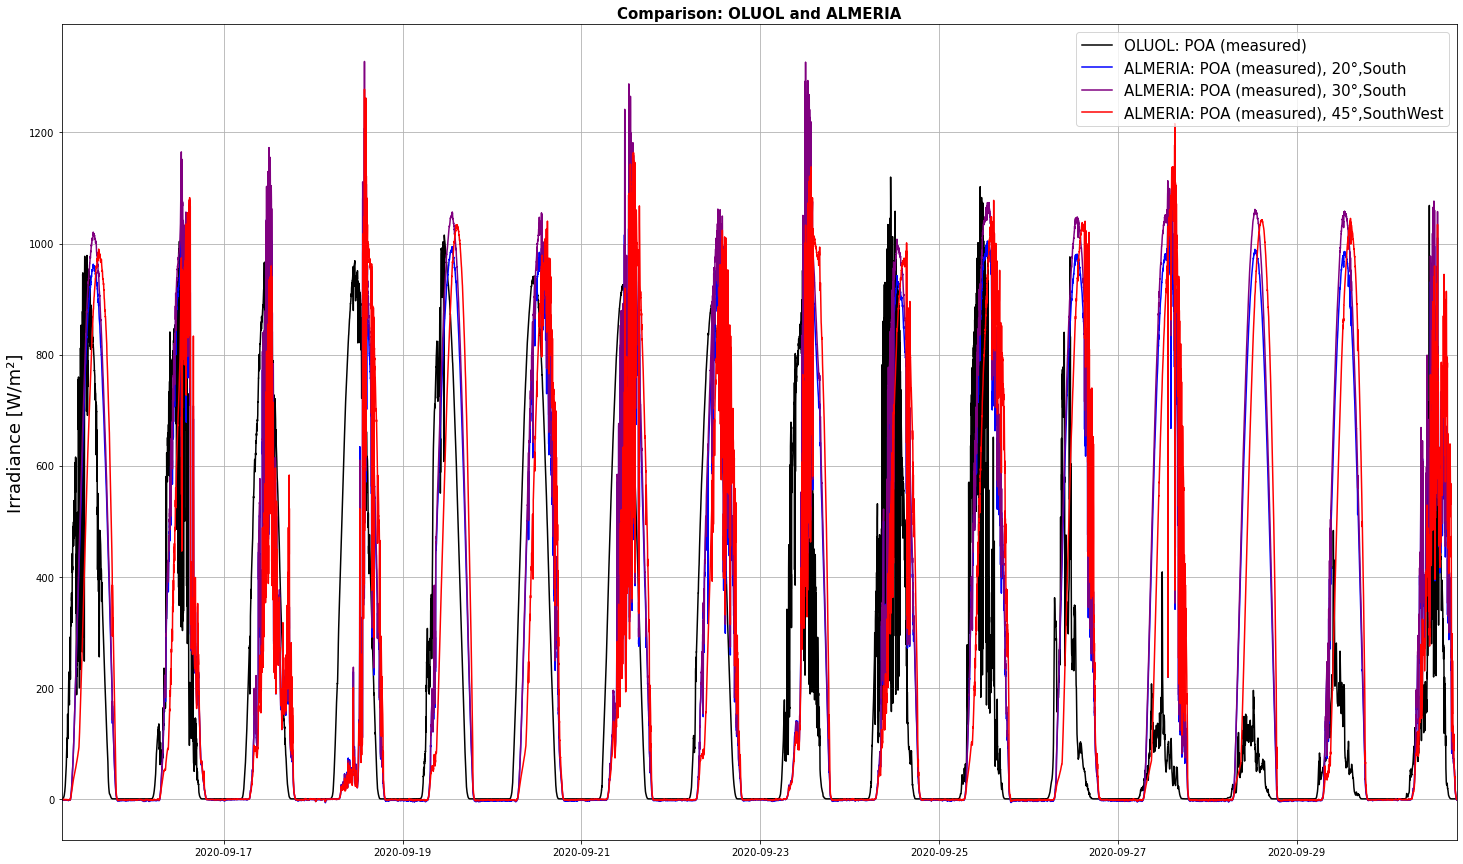

<Figure size 432x288 with 0 Axes>

In [84]:
plt.figure(figsize= (25,15))
plt.title('Comparison: OLUOL and ALMERIA',fontsize=15, weight='bold')
left = dt.datetime(2020, 9, 15,4,30)
right = dt.datetime(2020, 9, 30,19)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlim([left,right])
plt.plot(OLUOL_dts, OLUOL_GTI, label='OLUOL: POA (measured)',color='black', linewidth=1.5)
plt.plot(ALM_dts, ALM_GTI_20S, label='ALMERIA: POA (measured), 20°,South',color='blue', linewidth=1.5)
plt.plot(ALM_dts, ALM_GTI_30S, label='ALMERIA: POA (measured), 30°,South',color='purple', linewidth=1.5)
plt.plot(ALM_dts, ALM_GTI_45SW, label='ALMERIA: POA (measured), 45°,SouthWest',color='red', linewidth=1.5)

plt.legend()
plt.ylabel('Irradiance [W/m²]', fontsize=18)
plt.legend(fontsize=15)
plt.grid()
plt.show()

plt.savefig('OLUOL_ALM.png',dpi=500)

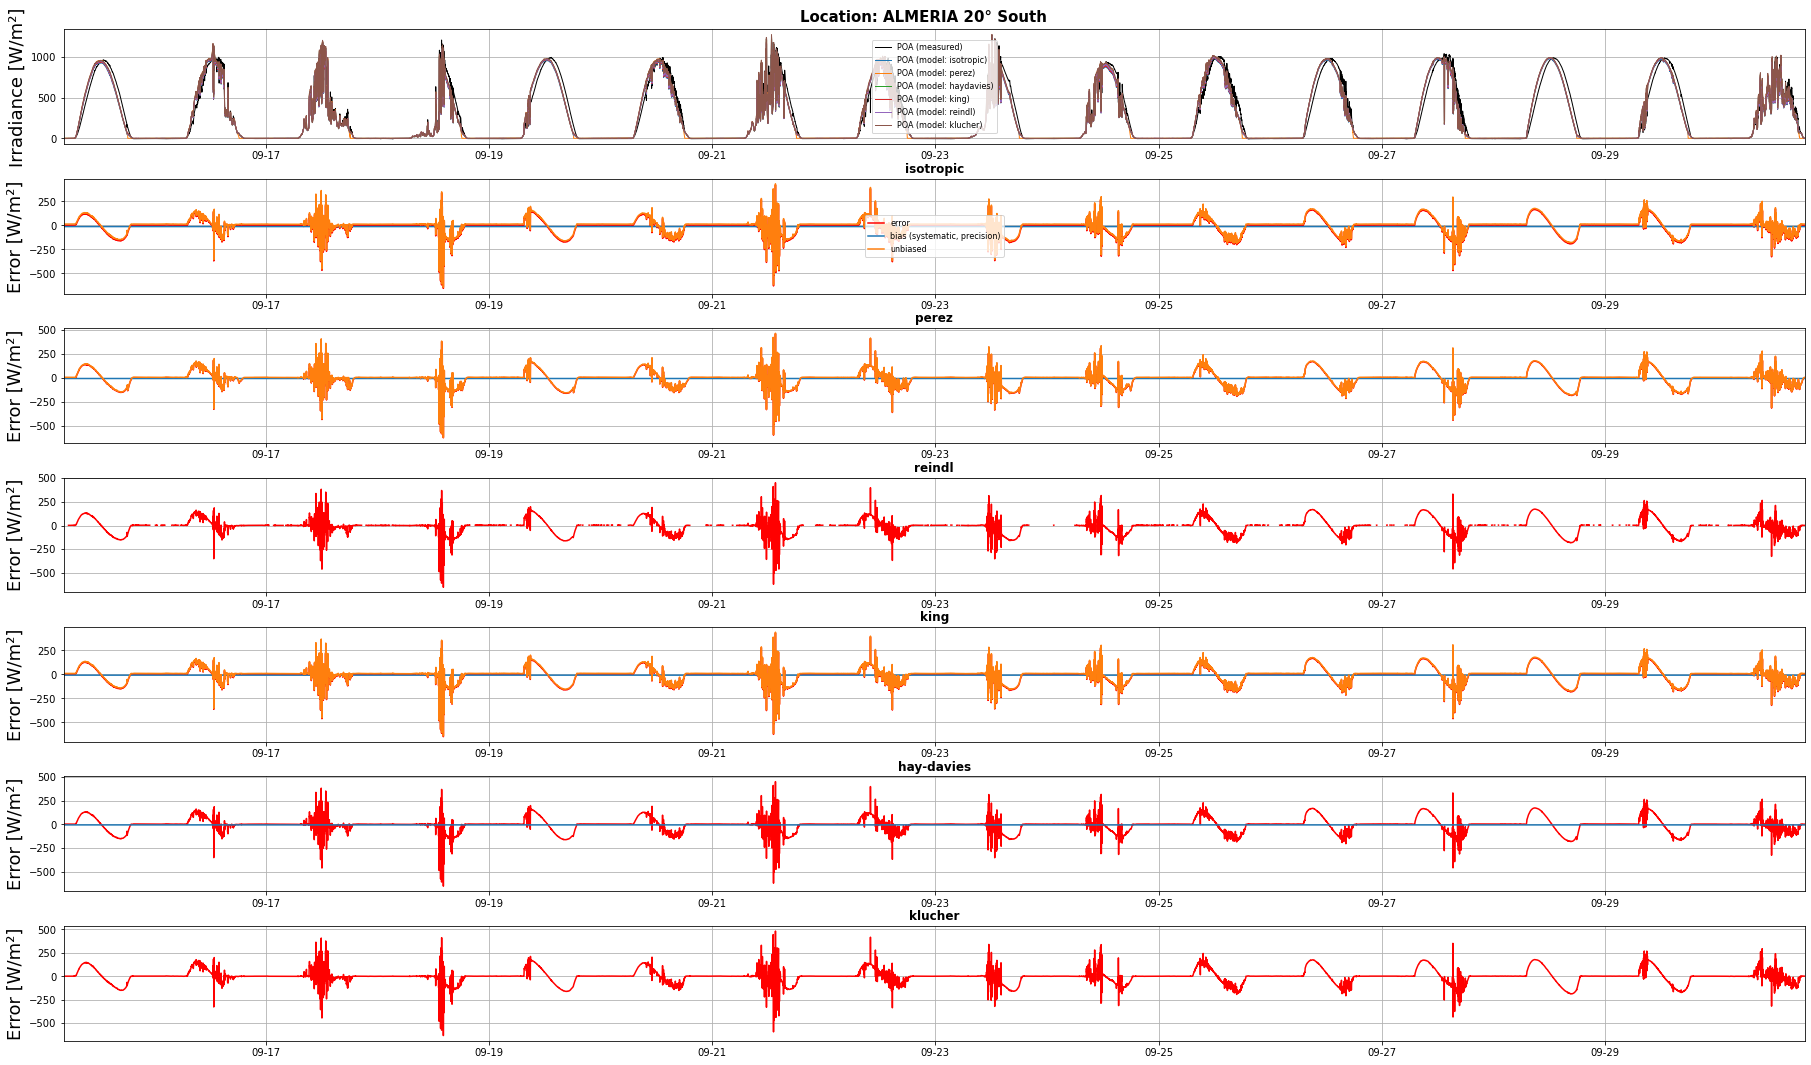

In [85]:
import matplotlib.dates as mdates
import datetime as dt

fig, axs = plt.subplots(7, figsize= (25,15))
fig.suptitle('Location: ALMERIA 20° South',fontsize=15, weight='bold')
fig.tight_layout()

left = dt.datetime(2020, 9, 15,4,30)
right = dt.datetime(2020, 9, 30,19)

ax = axs[0]
fig.subplots_adjust(hspace=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(ALM_dts, ALM_GTI_20S, label='POA (measured)',color='black', linewidth=1)
ax.plot(ALM_dts, ALM_GTI_20S_iso['poa_global'], label='POA (model: isotropic)', linewidth=1)
ax.plot(ALM_dts, ALM_GTI_20S_perez['poa_global'], label='POA (model: perez)', linewidth=1)
ax.plot(ALM_dts, ALM_GTI_20S_haydavies['poa_global'], label='POA (model: haydavies)', linewidth=1)
ax.plot(ALM_dts, ALM_GTI_20S_king['poa_global'], label='POA (model: king)', linewidth=1)
ax.plot(ALM_dts, ALM_GTI_20S_reindl['poa_global'], label='POA (model: reindl)', linewidth=1)
ax.plot(ALM_dts, ALM_GTI_20S_klucher['poa_global'], label='POA (model: klucher)', linewidth=1)
#ax.tick_params(axis='x', labelrotation=45)
#ax.set_xlabel('Datetime',fontsize=18)
ax.set_ylabel('Irradiance [W/m²]', fontsize=18)
ax.legend(fontsize=8,loc='center')
ax.grid()

ax = axs[1]
ax.set_title('isotropic', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(ALM_dts, ALM_GTI_20S_iso_err, 'r', label='error')
ax.plot(ALM_dts, np.ones(ALM_GTI_20S_iso_err.size)*ALM_GTI_20S_iso_bias, label='bias (systematic, precision)')
ax.plot(ALM_dts, ALM_GTI_20S_iso_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.legend(fontsize=8,loc='center')
ax.grid()

ax = axs[2]
ax.set_title('perez', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(ALM_dts, ALM_GTI_20S_perez_err, 'r', label='error')
ax.plot(ALM_dts, np.ones(ALM_GTI_20S_perez_err.size)*ALM_GTI_20S_perez_bias, label='bias (systematic, precision)')
ax.plot(ALM_dts, ALM_GTI_20S_perez_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[3]
ax.set_title('reindl', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(ALM_dts, ALM_GTI_20S_reindl_err, 'r', label='error')
ax.plot(ALM_dts, np.ones(ALM_GTI_20S_reindl_err.size)*ALM_GTI_20S_reindl_bias, label='bias (systematic, precision)')
ax.plot(ALM_dts, ALM_GTI_20S_reindl_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[4]
ax.set_title('king', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(ALM_dts, ALM_GTI_20S_king_err, 'r', label='error')
ax.plot(ALM_dts, np.ones(ALM_GTI_20S_king_err.size)*ALM_GTI_20S_king_bias, label='bias (systematic, precision)')
ax.plot(ALM_dts, ALM_GTI_20S_king_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[5]
ax.set_title('hay-davies', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(ALM_dts, ALM_GTI_20S_haydavies_err, 'r', label='error')
ax.plot(ALM_dts, np.ones(ALM_GTI_20S_haydavies_err.size)*ALM_GTI_20S_haydavies_bias, label='bias (systematic, precision)')
ax.plot(ALM_dts, ALM_GTI_20S_klucher_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[6]
ax.set_title('klucher', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(ALM_dts, ALM_GTI_20S_klucher_err, 'r', label='error')
ax.plot(ALM_dts, np.ones(ALM_GTI_20S_klucher_err.size)*ALM_GTI_20S_klucher_bias, label='bias (systematic, precision)')
ax.plot(ALM_dts, ALM_GTI_20S_klucher_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

plt.savefig('ALM.png',dpi=500)

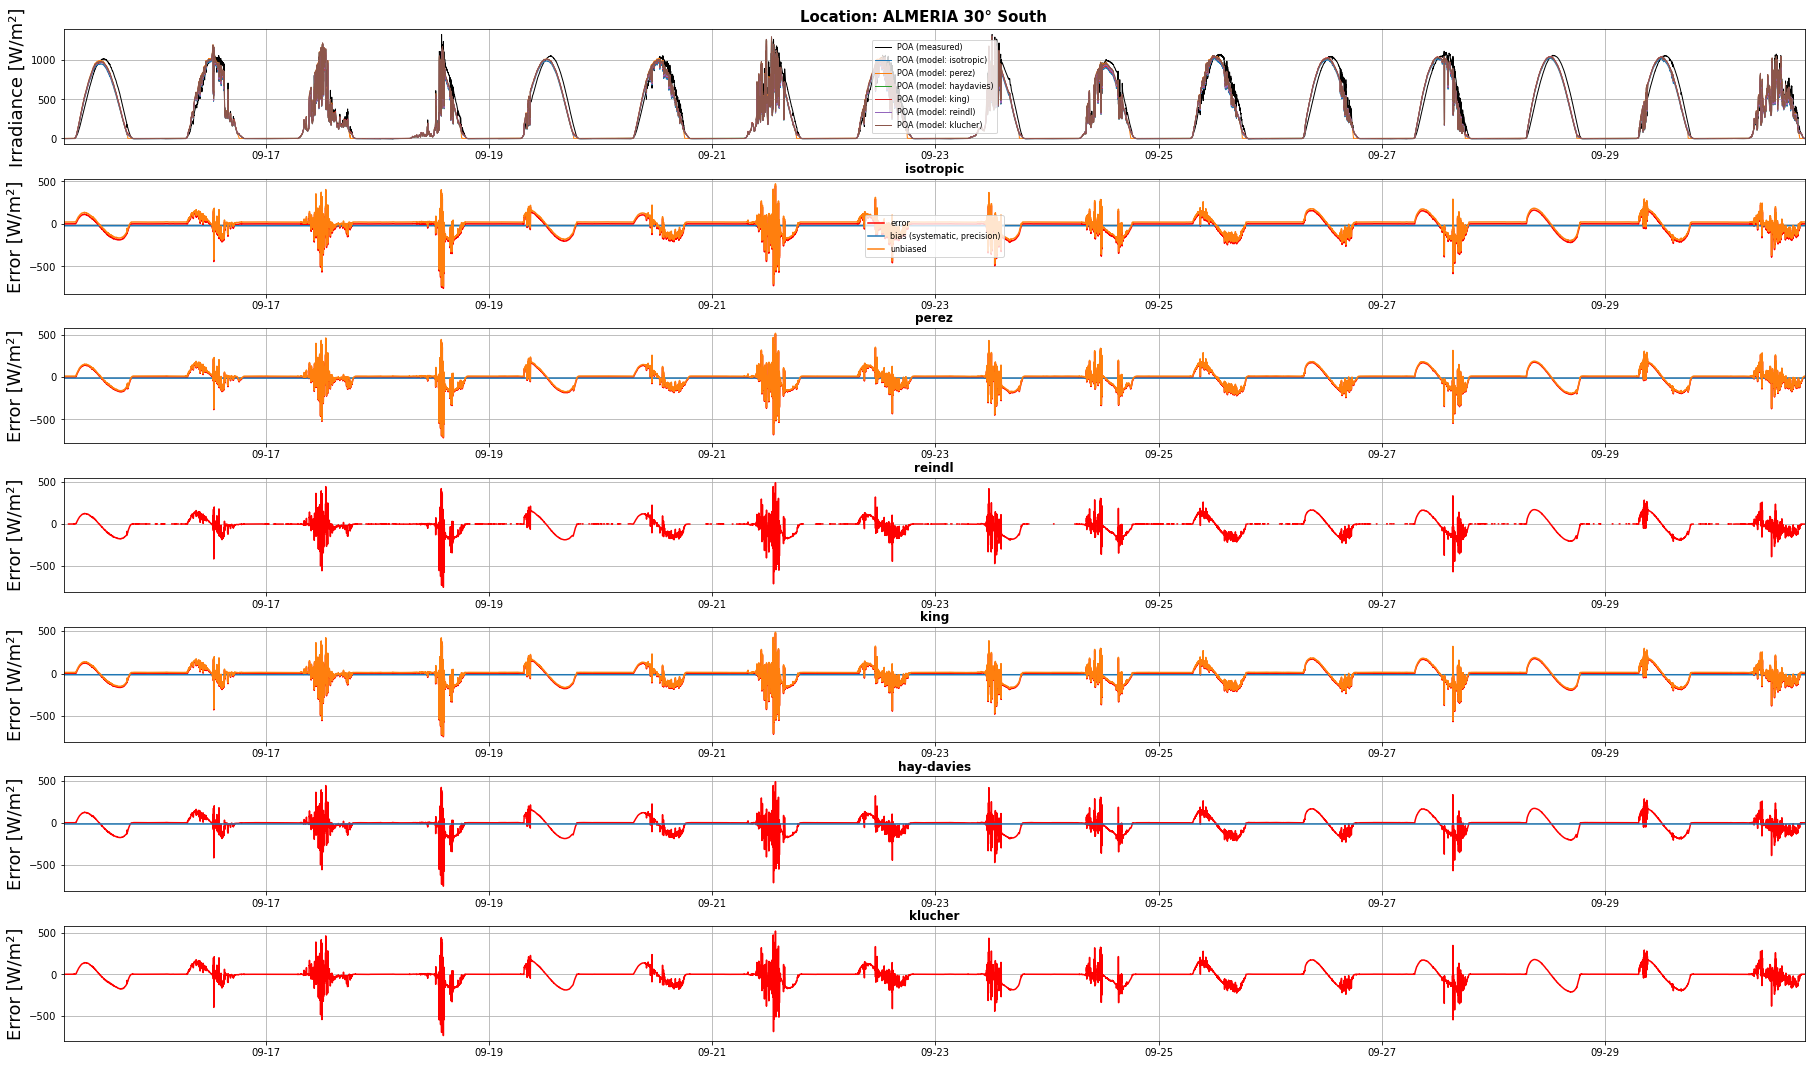

In [86]:
fig, axs = plt.subplots(7, figsize= (25,15))
fig.suptitle('Location: ALMERIA 30° South',fontsize=15, weight='bold')
fig.tight_layout()

left = dt.datetime(2020, 9, 15,4,30)
right = dt.datetime(2020, 9, 30,19)

ax = axs[0]
fig.subplots_adjust(hspace=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(ALM_dts, ALM_GTI_30S, label='POA (measured)',color='black', linewidth=1)
ax.plot(ALM_dts, ALM_GTI_30S_iso['poa_global'], label='POA (model: isotropic)', linewidth=1)
ax.plot(ALM_dts, ALM_GTI_30S_perez['poa_global'], label='POA (model: perez)', linewidth=1)
ax.plot(ALM_dts, ALM_GTI_30S_haydavies['poa_global'], label='POA (model: haydavies)', linewidth=1)
ax.plot(ALM_dts, ALM_GTI_30S_king['poa_global'], label='POA (model: king)', linewidth=1)
ax.plot(ALM_dts, ALM_GTI_30S_reindl['poa_global'], label='POA (model: reindl)', linewidth=1)
ax.plot(ALM_dts, ALM_GTI_30S_klucher['poa_global'], label='POA (model: klucher)', linewidth=1)
#ax.tick_params(axis='x', labelrotation=45)
#ax.set_xlabel('Datetime',fontsize=18)
ax.set_ylabel('Irradiance [W/m²]', fontsize=18)
ax.legend(fontsize=8,loc='center')
ax.grid()

ax = axs[1]
ax.set_title('isotropic', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(ALM_dts, ALM_GTI_30S_iso_err, 'r', label='error')
ax.plot(ALM_dts, np.ones(ALM_GTI_30S_iso_err.size)*ALM_GTI_30S_iso_bias, label='bias (systematic, precision)')
ax.plot(ALM_dts, ALM_GTI_30S_iso_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.legend(fontsize=8,loc='center')
ax.grid()

ax = axs[2]
ax.set_title('perez', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(ALM_dts, ALM_GTI_30S_perez_err, 'r', label='error')
ax.plot(ALM_dts, np.ones(ALM_GTI_30S_perez_err.size)*ALM_GTI_30S_perez_bias, label='bias (systematic, precision)')
ax.plot(ALM_dts, ALM_GTI_30S_perez_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[3]
ax.set_title('reindl', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(ALM_dts, ALM_GTI_30S_reindl_err, 'r', label='error')
ax.plot(ALM_dts, np.ones(ALM_GTI_30S_reindl_err.size)*ALM_GTI_30S_reindl_bias, label='bias (systematic, precision)')
ax.plot(ALM_dts, ALM_GTI_30S_reindl_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[4]
ax.set_title('king', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(ALM_dts, ALM_GTI_30S_king_err, 'r', label='error')
ax.plot(ALM_dts, np.ones(ALM_GTI_30S_king_err.size)*ALM_GTI_30S_king_bias, label='bias (systematic, precision)')
ax.plot(ALM_dts, ALM_GTI_30S_king_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[5]
ax.set_title('hay-davies', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(ALM_dts, ALM_GTI_30S_haydavies_err, 'r', label='error')
ax.plot(ALM_dts, np.ones(ALM_GTI_30S_haydavies_err.size)*ALM_GTI_30S_haydavies_bias, label='bias (systematic, precision)')
ax.plot(ALM_dts, ALM_GTI_30S_klucher_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[6]
ax.set_title('klucher', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(ALM_dts, ALM_GTI_30S_klucher_err, 'r', label='error')
ax.plot(ALM_dts, np.ones(ALM_GTI_30S_klucher_err.size)*ALM_GTI_30S_klucher_bias, label='bias (systematic, precision)')
ax.plot(ALM_dts, ALM_GTI_30S_klucher_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

#plt.savefig('CLO.png',dpi=500)

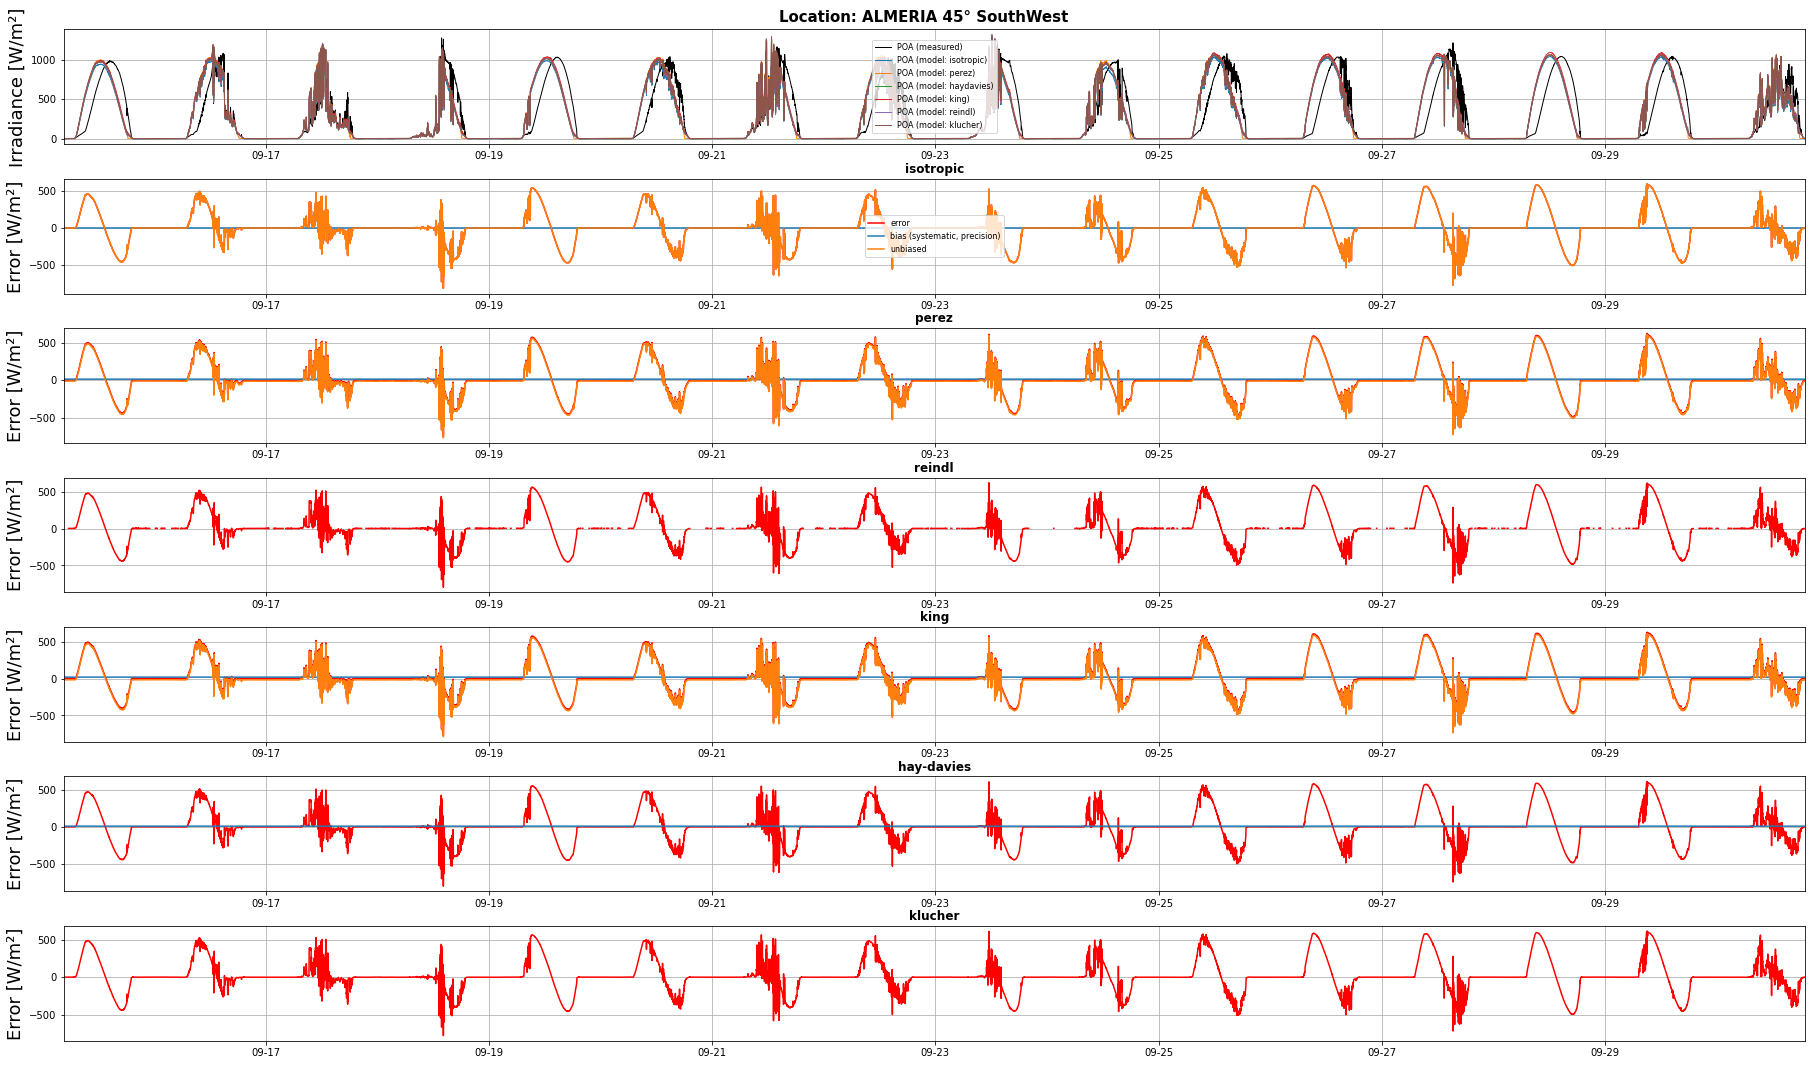

In [87]:
fig, axs = plt.subplots(7, figsize= (25,15))
fig.suptitle('Location: ALMERIA 45° SouthWest',fontsize=15, weight='bold')
fig.tight_layout()

left = dt.datetime(2020, 9, 15,4,30)
right = dt.datetime(2020, 9, 30,19)

ax = axs[0]
fig.subplots_adjust(hspace=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(ALM_dts, ALM_GTI_45SW, label='POA (measured)',color='black', linewidth=1)
ax.plot(ALM_dts, ALM_GTI_45SW_iso['poa_global'], label='POA (model: isotropic)', linewidth=1)
ax.plot(ALM_dts, ALM_GTI_45SW_perez['poa_global'], label='POA (model: perez)', linewidth=1)
ax.plot(ALM_dts, ALM_GTI_45SW_haydavies['poa_global'], label='POA (model: haydavies)', linewidth=1)
ax.plot(ALM_dts, ALM_GTI_45SW_king['poa_global'], label='POA (model: king)', linewidth=1)
ax.plot(ALM_dts, ALM_GTI_45SW_reindl['poa_global'], label='POA (model: reindl)', linewidth=1)
ax.plot(ALM_dts, ALM_GTI_45SW_klucher['poa_global'], label='POA (model: klucher)', linewidth=1)
#ax.tick_params(axis='x', labelrotation=45)
#ax.set_xlabel('Datetime',fontsize=18)
ax.set_ylabel('Irradiance [W/m²]', fontsize=18)
ax.legend(fontsize=8,loc='center')
ax.grid()

ax = axs[1]
ax.set_title('isotropic', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(ALM_dts, ALM_GTI_45SW_iso_err, 'r', label='error')
ax.plot(ALM_dts, np.ones(ALM_GTI_45SW_iso_err.size)*ALM_GTI_45SW_iso_bias, label='bias (systematic, precision)')
ax.plot(ALM_dts, ALM_GTI_45SW_iso_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.legend(fontsize=8,loc='center')
ax.grid()

ax = axs[2]
ax.set_title('perez', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(ALM_dts, ALM_GTI_45SW_perez_err, 'r', label='error')
ax.plot(ALM_dts, np.ones(ALM_GTI_45SW_perez_err.size)*ALM_GTI_45SW_perez_bias, label='bias (systematic, precision)')
ax.plot(ALM_dts, ALM_GTI_45SW_perez_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[3]
ax.set_title('reindl', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(ALM_dts, ALM_GTI_45SW_reindl_err, 'r', label='error')
ax.plot(ALM_dts, np.ones(ALM_GTI_45SW_reindl_err.size)*ALM_GTI_45SW_reindl_bias, label='bias (systematic, precision)')
ax.plot(ALM_dts, ALM_GTI_45SW_reindl_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[4]
ax.set_title('king', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(ALM_dts, ALM_GTI_45SW_king_err, 'r', label='error')
ax.plot(ALM_dts, np.ones(ALM_GTI_45SW_king_err.size)*ALM_GTI_45SW_king_bias, label='bias (systematic, precision)')
ax.plot(ALM_dts, ALM_GTI_45SW_king_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[5]
ax.set_title('hay-davies', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(ALM_dts, ALM_GTI_45SW_haydavies_err, 'r', label='error')
ax.plot(ALM_dts, np.ones(ALM_GTI_45SW_haydavies_err.size)*ALM_GTI_45SW_haydavies_bias, label='bias (systematic, precision)')
ax.plot(ALM_dts, ALM_GTI_45SW_klucher_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

ax = axs[6]
ax.set_title('klucher', weight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([left,right])
ax.plot(ALM_dts, ALM_GTI_45SW_klucher_err, 'r', label='error')
ax.plot(ALM_dts, np.ones(ALM_GTI_45SW_klucher_err.size)*ALM_GTI_45SW_klucher_bias, label='bias (systematic, precision)')
ax.plot(ALM_dts, ALM_GTI_45SW_klucher_err_unbiased, label='unbiased')
ax.set_ylabel('Error [W/m²]',fontsize=18)
#ax.set_xlabel('Datetime',fontsize=18)
#ax.tick_params(axis='x', labelrotation=45)
ax.grid()

#plt.savefig('CLO.png',dpi=500)

## Error Results

In [75]:
print('iso')
print('The Bias is: {b:.2f} w/m²'.format(b=ALM_GTI_20S_iso_bias))
print('The STD is: {s:.2f} w/m²'.format(s=ALM_GTI_20S_iso_std))
print('The RMSE is {r:.2f} W/m²'.format(r=ALM_GTI_20S_iso_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=ALM_GTI_20S_iso_MAE))

print('perez')
print('The Bias is: {b:.2f} w/m²'.format(b=ALM_GTI_20S_perez_bias))
print('The STD is: {s:.2f} w/m²'.format(s=ALM_GTI_20S_perez_std))
print('The RMSE is {r:.2f} W/m²'.format(r=ALM_GTI_20S_perez_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=ALM_GTI_20S_perez_MAE))

#print('reindl')
#print('The Bias is: {b:.2f} w/m²'.format(b=ALM_GTI_20S_reindl_bias))
#print('The STD is: {s:.2f} w/m²'.format(s=ALM_GTI_20S_reindl_std))
#print('The RMSE is {r:.2f} W/m²'.format(r=ALM_GTI_20S_reindl_RMSE))
#print('The MAE is {m:.2f} W/m²\n'.format(m=ALM_GTI_20S_reindl_MAE))

print('king')
print('The Bias is: {b:.2f} w/m²'.format(b=ALM_GTI_20S_king_bias))
print('The STD is: {s:.2f} w/m²'.format(s=ALM_GTI_20S_king_std))
print('The RMSE is {r:.2f} W/m²'.format(r=ALM_GTI_20S_king_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=ALM_GTI_20S_king_MAE))

print('haydavies')
print('The Bias is: {b:.2f} w/m²'.format(b=ALM_GTI_20S_haydavies_bias))
print('The STD is: {s:.2f} w/m²'.format(s=ALM_GTI_20S_haydavies_std))
print('The RMSE is {r:.2f} W/m²'.format(r=ALM_GTI_20S_haydavies_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=ALM_GTI_20S_haydavies_MAE))

#print('klucher')
#print('The Bias is: {b:.2f} w/m²'.format(b=ALM_GTI_20S_klucher_bias))
#print('The STD is: {s:.2f} w/m²'.format(s=ALM_GTI_20S_klucher_std))
#print('The RMSE is {r:.2f} W/m²'.format(r=ALM_GTI_20S_klucher_RMSE))
#print('The MAE is {m:.2f} W/m²\n'.format(m=ALM_GTI_20S_klucher_MAE))

iso
The Bias is: -10.83 w/m²
The STD is: 32.84 w/m²
The RMSE is 34.58 W/m²
The MAE is 15.25 W/m²

perez
The Bias is: -0.51 w/m²
The STD is: 33.05 w/m²
The RMSE is 33.05 W/m²
The MAE is 12.93 W/m²

king
The Bias is: -6.29 w/m²
The STD is: 31.04 w/m²
The RMSE is 31.67 W/m²
The MAE is 13.67 W/m²

haydavies
The Bias is: 0.92 w/m²
The STD is: 35.12 w/m²
The RMSE is 35.13 W/m²
The MAE is 13.43 W/m²



In [52]:
print('iso')
print('The Bias is: {b:.2f} w/m²'.format(b=ALM_GTI_30S_iso_bias))
print('The STD is: {s:.2f} w/m²'.format(s=ALM_GTI_30S_iso_std))
print('The RMSE is {r:.2f} W/m²'.format(r=ALM_GTI_30S_iso_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=ALM_GTI_30S_iso_MAE))

print('perez')
print('The Bias is: {b:.2f} w/m²'.format(b=ALM_GTI_30S_perez_bias))
print('The STD is: {s:.2f} w/m²'.format(s=ALM_GTI_30S_perez_std))
print('The RMSE is {r:.2f} W/m²'.format(r=ALM_GTI_30S_perez_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=ALM_GTI_30S_perez_MAE))

#print('reindl')
#print('The Bias is: {b:.2f} w/m²'.format(b=ALM_GTI_30S_reindl_bias))
#print('The STD is: {s:.2f} w/m²'.format(s=ALM_GTI_30S_reindl_std))
#print('The RMSE is {r:.2f} W/m²'.format(r=ALM_GTI_30S_reindl_RMSE))
#print('The MAE is {m:.2f} W/m²\n'.format(m=ALM_GTI_30S_reindl_MAE))

print('king')
print('The Bias is: {b:.2f} w/m²'.format(b=ALM_GTI_30S_king_bias))
print('The STD is: {s:.2f} w/m²'.format(s=ALM_GTI_30S_king_std))
print('The RMSE is {r:.2f} W/m²'.format(r=ALM_GTI_30S_king_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=ALM_GTI_30S_king_MAE))

print('haydavies')
print('The Bias is: {b:.2f} w/m²'.format(b=ALM_GTI_30S_haydavies_bias))
print('The STD is: {s:.2f} w/m²'.format(s=ALM_GTI_30S_haydavies_std))
print('The RMSE is {r:.2f} W/m²'.format(r=ALM_GTI_30S_haydavies_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=ALM_GTI_30S_haydavies_MAE))

#print('klucher')
#print('The Bias is: {b:.2f} w/m²'.format(b=ALM_GTI_30S_klucher_bias))
#print('The STD is: {s:.2f} w/m²'.format(s=ALM_GTI_30S_klucher_std))
#print('The RMSE is {r:.2f} W/m²'.format(r=ALM_GTI_30S_klucher_RMSE))
#print('The MAE is {m:.2f} W/m²\n'.format(m=ALM_GTI_30S_klucher_MAE))

iso
The Bias is: -21.47 w/m²
The STD is: 78.23 w/m²
The RMSE is 81.13 W/m²
The MAE is 44.82 W/m²

perez
The Bias is: -11.01 w/m²
The STD is: 76.41 w/m²
The RMSE is 77.18 W/m²
The MAE is 44.38 W/m²

king
The Bias is: -12.44 w/m²
The STD is: 73.72 w/m²
The RMSE is 74.76 W/m²
The MAE is 42.13 W/m²

haydavies
The Bias is: -13.24 w/m²
The STD is: 74.66 w/m²
The RMSE is 75.83 W/m²
The MAE is 42.91 W/m²



In [53]:
print('iso')
print('The Bias is: {b:.2f} w/m²'.format(b=ALM_GTI_45SW_iso_bias))
print('The STD is: {s:.2f} w/m²'.format(s=ALM_GTI_45SW_iso_std))
print('The RMSE is {r:.2f} W/m²'.format(r=ALM_GTI_45SW_iso_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=ALM_GTI_45SW_iso_MAE))

print('perez')
print('The Bias is: {b:.2f} w/m²'.format(b=ALM_GTI_45SW_perez_bias))
print('The STD is: {s:.2f} w/m²'.format(s=ALM_GTI_45SW_perez_std))
print('The RMSE is {r:.2f} W/m²'.format(r=ALM_GTI_45SW_perez_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=ALM_GTI_45SW_perez_MAE))

#print('reindl')
#print('The Bias is: {b:.2f} w/m²'.format(b=ALM_GTI_45SW_reindl_bias))
#print('The STD is: {s:.2f} w/m²'.format(s=ALM_GTI_45SW_reindl_std))
#print('The RMSE is {r:.2f} W/m²'.format(r=ALM_GTI_45SW_reindl_RMSE))
#print('The MAE is {m:.2f} W/m²\n'.format(m=ALM_GTI_45SW_reindl_MAE))

print('king')
print('The Bias is: {b:.2f} w/m²'.format(b=ALM_GTI_45SW_king_bias))
print('The STD is: {s:.2f} w/m²'.format(s=ALM_GTI_45SW_king_std))
print('The RMSE is {r:.2f} W/m²'.format(r=ALM_GTI_45SW_king_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=ALM_GTI_45SW_king_MAE))

print('haydavies')
print('The Bias is: {b:.2f} w/m²'.format(b=ALM_GTI_45SW_haydavies_bias))
print('The STD is: {s:.2f} w/m²'.format(s=ALM_GTI_45SW_haydavies_std))
print('The RMSE is {r:.2f} W/m²'.format(r=ALM_GTI_45SW_haydavies_RMSE))
print('The MAE is {m:.2f} W/m²\n'.format(m=ALM_GTI_45SW_haydavies_MAE))

#print('klucher')
#print('The Bias is: {b:.2f} w/m²'.format(b=ALM_GTI_45SW_klucher_bias))
#print('The STD is: {s:.2f} w/m²'.format(s=ALM_GTI_45SW_klucher_std))
#print('The RMSE is {r:.2f} W/m²'.format(r=ALM_GTI_45SW_klucher_RMSE))
#print('The MAE is {m:.2f} W/m²\n'.format(m=ALM_GTI_45SW_klucher_MAE))

iso
The Bias is: 0.45 w/m²
The STD is: 197.37 w/m²
The RMSE is 197.37 W/m²
The MAE is 110.66 W/m²

perez
The Bias is: 14.37 w/m²
The STD is: 203.01 w/m²
The RMSE is 203.48 W/m²
The MAE is 114.88 W/m²

king
The Bias is: 19.19 w/m²
The STD is: 195.91 w/m²
The RMSE is 196.84 W/m²
The MAE is 109.57 W/m²

haydavies
The Bias is: 10.55 w/m²
The STD is: 197.96 w/m²
The RMSE is 198.24 W/m²
The MAE is 111.32 W/m²



In [54]:
table_alm = np.array([['Tilt','Azimuth','Model','Bias','STD','RMSE','MAE'],
                [30,'S','iso',-21.47,78.23,81.13,44.82],
                [30,'S','perez',-11.01,76.41,77.18,44.38], 
                [30,'S','king',-12.44,73.72,74.76,42.13],
                [30,'S','haydavies',-13.24,74.66,75.83,42.91], 
                [20,'S','iso',-12.26,24.31,70.29,39.23],
                [20,'S','perez',-5.01,69.53,69.70,40.49],
                [20,'S','king',-7.72,67.60,68.04,38.76],
                [20,'S','haydavies',-6.04,67.46,67.73,38.68], 
                [45,'SW','iso',0.45,197.37,197.37,110.66],
                [45,'SW','perez',14.37 ,203.01,203.48,114.88],  
                [45,'SW','king',19.19,195.91,196.84,109.57],
                [45,'SW','haydavies',10.55,197.96,198.24,111.32]])


df_origin1 = pd.DataFrame(table_alm)
df_origin1.columns = df_origin1.iloc[0]
df_origin1.head(1)
df1= df_origin1[1:]

#fixing string to float
df_new1 = df1[['Tilt','Bias','STD','RMSE','MAE']].astype(float)
df_new1['Model'] = df1['Model']
df_new1['Azimuth'] = df1['Azimuth']

columns_titles = ["Tilt","Azimuth","Model","Bias","STD","RMSE","MAE"]
df_new1=df_new1.reindex(columns=columns_titles)
df_new1.head(10)

# bias = precision (systematic error)
# std = accuracy 
# RMSE = std with 0 bias, without systamatic error, spread of best fit, well fitted for comparison models
# MAE = all deviations regardless positive or negative, including bias

,Tilt,Azimuth,Model,Bias,STD,RMSE,MAE
1,30.0,S,iso,-21.47,78.23,81.13,44.82
2,30.0,S,perez,-11.01,76.41,77.18,44.38
3,30.0,S,king,-12.44,73.72,74.76,42.13
4,30.0,S,haydavies,-13.24,74.66,75.83,42.91
5,20.0,S,iso,-12.26,24.31,70.29,39.23
6,20.0,S,perez,-5.01,69.53,69.70,40.49
7,20.0,S,king,-7.72,67.60,68.04,38.76
8,20.0,S,haydavies,-6.04,67.46,67.73,38.68
9,45.0,SW,iso,0.45,197.37,197.37,110.66
10,45.0,SW,perez,14.37,203.01,203.48,114.88


In [55]:
df_new1.sort_values(['RMSE'], ascending=True)

,Tilt,Azimuth,Model,Bias,STD,RMSE,MAE
8,20.0,S,haydavies,-6.04,67.46,67.73,38.68
7,20.0,S,king,-7.72,67.60,68.04,38.76
6,20.0,S,perez,-5.01,69.53,69.70,40.49
5,20.0,S,iso,-12.26,24.31,70.29,39.23
3,30.0,S,king,-12.44,73.72,74.76,42.13
4,30.0,S,haydavies,-13.24,74.66,75.83,42.91
2,30.0,S,perez,-11.01,76.41,77.18,44.38
1,30.0,S,iso,-21.47,78.23,81.13,44.82
11,45.0,SW,king,19.19,195.91,196.84,109.57
9,45.0,SW,iso,0.45,197.37,197.37,110.66
